# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

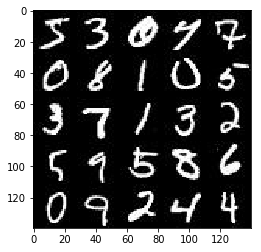

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

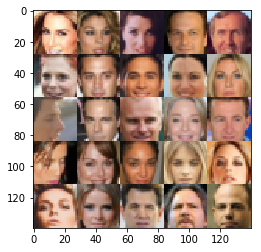

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

C:\Users\lobov\Anaconda3\envs\tfgpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.6.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [147]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'real_input')
    z_input = tf.placeholder(tf.float32, (None, z_dim), name = 'z_input')
    learning_rate = tf.placeholder(tf.float32, (None) , name = 'learning_rate')
    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [163]:
def discriminator(images, reuse=False, alpha = 0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse = reuse):
        # Input layer is 28x28x3
        conv1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding = 'same')
        #bn1 = tf.layers.batch_normalization(conv1, training = True)
        relu1 = tf.maximum(alpha*conv1, conv1)
        # 14x14x64
        conv2 = tf.layers.conv2d(relu1, 128, 5, strides = 2, padding = 'same')
        bn2 = tf.layers.batch_normalization(conv2, training = True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        # 7x7x128  
        conv3 = tf.layers.conv2d(relu2, 256, 5, strides = 2, padding = 'same')
        bn3 = tf.layers.batch_normalization(conv3, training = True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        # 4x4x256
        flatten = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flatten, 1)
        out = tf.sigmoid(logits)
    
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [164]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse = not is_train):
        #x1 = tf.layers.dense(z, 4*4*256)
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512
        
        #x2 = tf.layers.conv2d_transpose(x1, 512, 5, strides=2, padding='same')
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x128
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [165]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels = tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.ones_like(d_logits_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [166]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [167]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [168]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #saver = tf.train.Saver()
    #tf.reset_default_graph()
    print_every = 25
    show_every = 100
    samples, losses = [], []
    steps = 0
    
    out_channel_dim = data_shape[3]
    print(out_channel_dim)
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], out_channel_dim, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images * 2
                # TODO: Train Model
                steps += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, 4, input_z, out_channel_dim, data_image_mode)
        #saver.save(sess, './checkpoints/generator.ckpt')
    #with open('samples.pkl', 'wb') as f:
        #pkl.dump(samples, f)
    
    return losses, samples

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

1
Epoch 1/30... Discriminator Loss: 0.0244... Generator Loss: 5.5346
Epoch 1/30... Discriminator Loss: 0.0130... Generator Loss: 4.8039
Epoch 1/30... Discriminator Loss: 0.0072... Generator Loss: 5.4770
Epoch 1/30... Discriminator Loss: 0.0010... Generator Loss: 12.0051


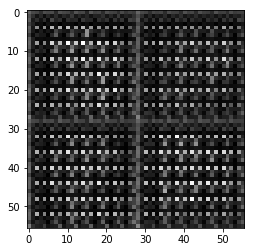

Epoch 1/30... Discriminator Loss: 4.3195... Generator Loss: 0.0384
Epoch 1/30... Discriminator Loss: 0.9943... Generator Loss: 1.1124
Epoch 1/30... Discriminator Loss: 0.9326... Generator Loss: 1.1068
Epoch 1/30... Discriminator Loss: 1.3855... Generator Loss: 1.9639


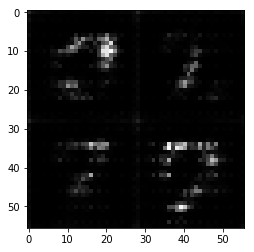

Epoch 1/30... Discriminator Loss: 0.9740... Generator Loss: 1.6564
Epoch 1/30... Discriminator Loss: 0.7555... Generator Loss: 1.2747
Epoch 1/30... Discriminator Loss: 0.9911... Generator Loss: 1.2449
Epoch 1/30... Discriminator Loss: 0.9383... Generator Loss: 0.8300


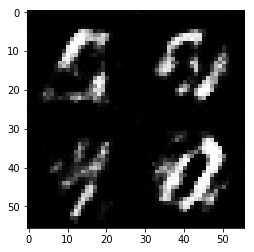

Epoch 1/30... Discriminator Loss: 1.1566... Generator Loss: 1.8255
Epoch 1/30... Discriminator Loss: 0.7033... Generator Loss: 1.2643
Epoch 1/30... Discriminator Loss: 0.7921... Generator Loss: 0.9727
Epoch 1/30... Discriminator Loss: 0.7491... Generator Loss: 1.9385


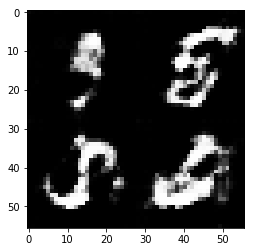

Epoch 1/30... Discriminator Loss: 0.7686... Generator Loss: 0.9686
Epoch 1/30... Discriminator Loss: 1.0270... Generator Loss: 1.2874
Epoch 2/30... Discriminator Loss: 1.1724... Generator Loss: 0.5333
Epoch 2/30... Discriminator Loss: 1.1023... Generator Loss: 0.6365


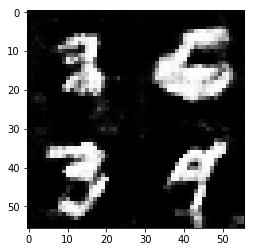

Epoch 2/30... Discriminator Loss: 0.8283... Generator Loss: 1.5078
Epoch 2/30... Discriminator Loss: 1.2599... Generator Loss: 1.8335
Epoch 2/30... Discriminator Loss: 1.0995... Generator Loss: 0.5834
Epoch 2/30... Discriminator Loss: 1.0481... Generator Loss: 0.6808


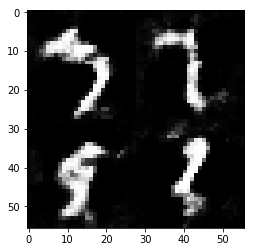

Epoch 2/30... Discriminator Loss: 1.1616... Generator Loss: 1.4411
Epoch 2/30... Discriminator Loss: 0.9907... Generator Loss: 0.8621
Epoch 2/30... Discriminator Loss: 1.2786... Generator Loss: 0.4869
Epoch 2/30... Discriminator Loss: 1.0295... Generator Loss: 0.6978


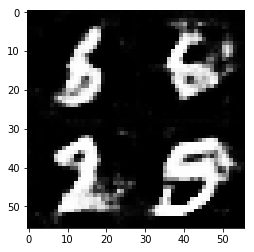

Epoch 2/30... Discriminator Loss: 1.1585... Generator Loss: 0.5873
Epoch 2/30... Discriminator Loss: 1.0182... Generator Loss: 1.1662
Epoch 2/30... Discriminator Loss: 0.8072... Generator Loss: 1.0310
Epoch 2/30... Discriminator Loss: 1.0749... Generator Loss: 1.5124


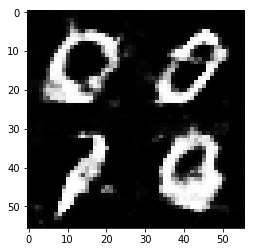

Epoch 2/30... Discriminator Loss: 1.0767... Generator Loss: 0.7078
Epoch 2/30... Discriminator Loss: 1.0699... Generator Loss: 0.6959
Epoch 2/30... Discriminator Loss: 0.9471... Generator Loss: 0.8375
Epoch 2/30... Discriminator Loss: 1.0301... Generator Loss: 1.8998


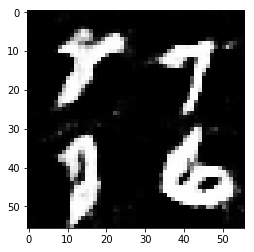

Epoch 2/30... Discriminator Loss: 1.1696... Generator Loss: 2.0457
Epoch 3/30... Discriminator Loss: 0.8712... Generator Loss: 0.9945
Epoch 3/30... Discriminator Loss: 0.9092... Generator Loss: 1.1943
Epoch 3/30... Discriminator Loss: 0.7617... Generator Loss: 1.5906


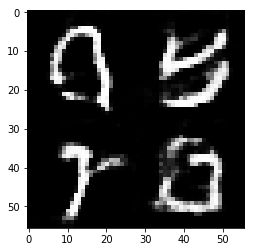

Epoch 3/30... Discriminator Loss: 0.9555... Generator Loss: 0.7441
Epoch 3/30... Discriminator Loss: 1.1641... Generator Loss: 0.5568
Epoch 3/30... Discriminator Loss: 0.8016... Generator Loss: 1.5377
Epoch 3/30... Discriminator Loss: 0.6600... Generator Loss: 1.5721


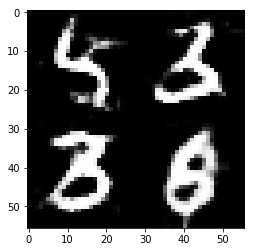

Epoch 3/30... Discriminator Loss: 0.9920... Generator Loss: 0.7918
Epoch 3/30... Discriminator Loss: 1.2577... Generator Loss: 0.4815
Epoch 3/30... Discriminator Loss: 0.7034... Generator Loss: 1.9822
Epoch 3/30... Discriminator Loss: 0.8654... Generator Loss: 1.2544


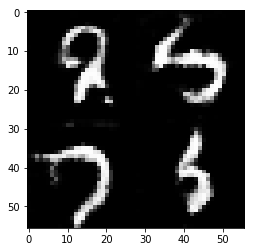

Epoch 3/30... Discriminator Loss: 1.3766... Generator Loss: 0.3809
Epoch 3/30... Discriminator Loss: 0.8155... Generator Loss: 1.1773
Epoch 3/30... Discriminator Loss: 1.2634... Generator Loss: 0.5776
Epoch 3/30... Discriminator Loss: 0.9058... Generator Loss: 1.4787


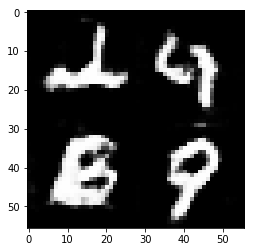

Epoch 3/30... Discriminator Loss: 0.9540... Generator Loss: 0.8296
Epoch 3/30... Discriminator Loss: 0.7991... Generator Loss: 0.9183
Epoch 3/30... Discriminator Loss: 0.8392... Generator Loss: 1.1463
Epoch 3/30... Discriminator Loss: 1.0610... Generator Loss: 0.8582


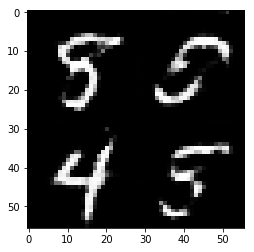

Epoch 4/30... Discriminator Loss: 0.8962... Generator Loss: 0.8004
Epoch 4/30... Discriminator Loss: 0.7937... Generator Loss: 1.1079
Epoch 4/30... Discriminator Loss: 0.9778... Generator Loss: 0.6542
Epoch 4/30... Discriminator Loss: 1.0474... Generator Loss: 0.6606


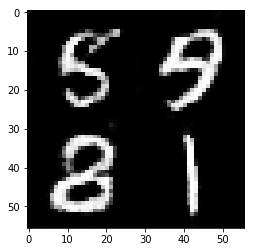

Epoch 4/30... Discriminator Loss: 1.0014... Generator Loss: 0.7132
Epoch 4/30... Discriminator Loss: 1.0521... Generator Loss: 0.6340
Epoch 4/30... Discriminator Loss: 1.2691... Generator Loss: 0.5392
Epoch 4/30... Discriminator Loss: 0.8414... Generator Loss: 0.9294


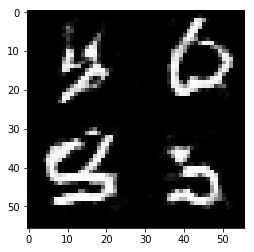

Epoch 4/30... Discriminator Loss: 0.9175... Generator Loss: 0.8499
Epoch 4/30... Discriminator Loss: 0.8415... Generator Loss: 1.3198
Epoch 4/30... Discriminator Loss: 0.8954... Generator Loss: 1.0140
Epoch 4/30... Discriminator Loss: 0.9920... Generator Loss: 0.6303


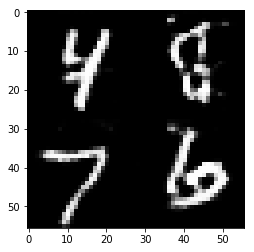

Epoch 4/30... Discriminator Loss: 0.8194... Generator Loss: 0.9548
Epoch 4/30... Discriminator Loss: 0.7194... Generator Loss: 1.2741
Epoch 4/30... Discriminator Loss: 0.8720... Generator Loss: 0.7856
Epoch 4/30... Discriminator Loss: 1.3346... Generator Loss: 0.4506


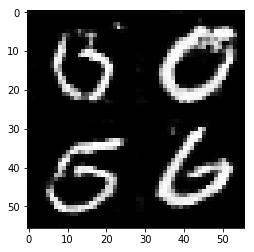

Epoch 4/30... Discriminator Loss: 1.4319... Generator Loss: 0.3950
Epoch 4/30... Discriminator Loss: 1.0819... Generator Loss: 1.4197
Epoch 5/30... Discriminator Loss: 0.8877... Generator Loss: 0.8850
Epoch 5/30... Discriminator Loss: 0.8104... Generator Loss: 1.0065


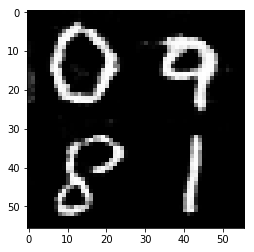

Epoch 5/30... Discriminator Loss: 0.9362... Generator Loss: 1.0959
Epoch 5/30... Discriminator Loss: 0.9413... Generator Loss: 0.9020
Epoch 5/30... Discriminator Loss: 1.0198... Generator Loss: 0.6286
Epoch 5/30... Discriminator Loss: 1.3868... Generator Loss: 0.3976


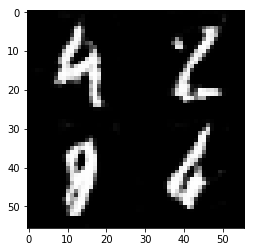

Epoch 5/30... Discriminator Loss: 0.7447... Generator Loss: 1.1678
Epoch 5/30... Discriminator Loss: 1.0225... Generator Loss: 0.7835
Epoch 5/30... Discriminator Loss: 0.8534... Generator Loss: 1.7743
Epoch 5/30... Discriminator Loss: 1.0837... Generator Loss: 0.6304


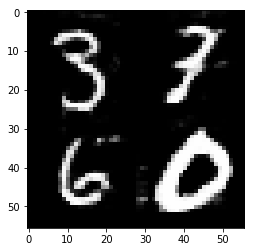

Epoch 5/30... Discriminator Loss: 0.9492... Generator Loss: 0.8894
Epoch 5/30... Discriminator Loss: 1.3842... Generator Loss: 0.3934
Epoch 5/30... Discriminator Loss: 1.0779... Generator Loss: 0.6209
Epoch 5/30... Discriminator Loss: 0.6199... Generator Loss: 1.5464


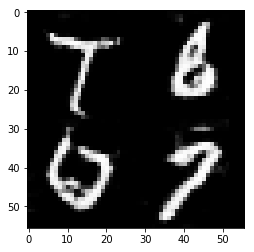

Epoch 5/30... Discriminator Loss: 0.7132... Generator Loss: 1.2732
Epoch 5/30... Discriminator Loss: 0.7105... Generator Loss: 0.9635
Epoch 5/30... Discriminator Loss: 1.5490... Generator Loss: 0.3342
Epoch 5/30... Discriminator Loss: 0.8094... Generator Loss: 0.8614


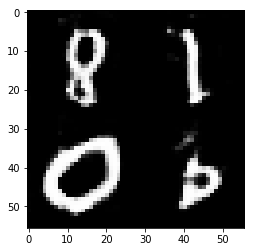

Epoch 5/30... Discriminator Loss: 0.7644... Generator Loss: 1.4640
Epoch 6/30... Discriminator Loss: 1.1470... Generator Loss: 0.6014
Epoch 6/30... Discriminator Loss: 0.8874... Generator Loss: 0.8897
Epoch 6/30... Discriminator Loss: 0.9990... Generator Loss: 0.6557


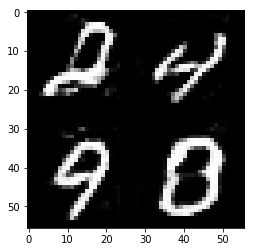

Epoch 6/30... Discriminator Loss: 0.7083... Generator Loss: 1.5268
Epoch 6/30... Discriminator Loss: 1.1225... Generator Loss: 1.9654
Epoch 6/30... Discriminator Loss: 0.9290... Generator Loss: 0.8686
Epoch 6/30... Discriminator Loss: 1.1423... Generator Loss: 0.5956


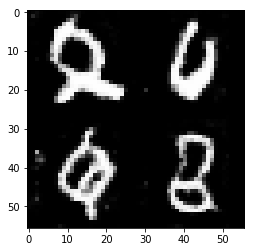

Epoch 6/30... Discriminator Loss: 0.8098... Generator Loss: 0.9150
Epoch 6/30... Discriminator Loss: 0.7733... Generator Loss: 1.2721
Epoch 6/30... Discriminator Loss: 0.9663... Generator Loss: 0.7291
Epoch 6/30... Discriminator Loss: 0.6409... Generator Loss: 1.1673


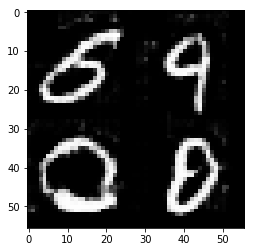

Epoch 6/30... Discriminator Loss: 1.4539... Generator Loss: 2.8357
Epoch 6/30... Discriminator Loss: 0.6149... Generator Loss: 1.7949
Epoch 6/30... Discriminator Loss: 1.4165... Generator Loss: 0.4305
Epoch 6/30... Discriminator Loss: 0.9009... Generator Loss: 0.9298


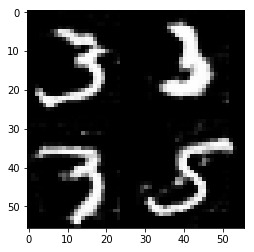

Epoch 6/30... Discriminator Loss: 0.8701... Generator Loss: 1.1272
Epoch 6/30... Discriminator Loss: 1.0903... Generator Loss: 2.5145
Epoch 6/30... Discriminator Loss: 1.5515... Generator Loss: 0.3354
Epoch 6/30... Discriminator Loss: 1.1064... Generator Loss: 1.7517


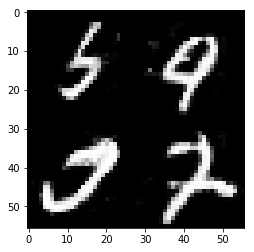

Epoch 7/30... Discriminator Loss: 1.3797... Generator Loss: 0.4460
Epoch 7/30... Discriminator Loss: 0.9615... Generator Loss: 0.7658
Epoch 7/30... Discriminator Loss: 0.9083... Generator Loss: 2.0417
Epoch 7/30... Discriminator Loss: 0.9388... Generator Loss: 0.6853


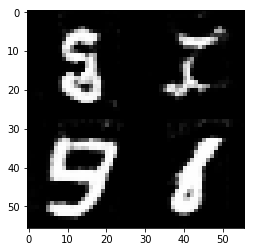

Epoch 7/30... Discriminator Loss: 0.7859... Generator Loss: 1.1019
Epoch 7/30... Discriminator Loss: 1.1753... Generator Loss: 0.5010
Epoch 7/30... Discriminator Loss: 0.8308... Generator Loss: 1.1616
Epoch 7/30... Discriminator Loss: 0.9591... Generator Loss: 0.9257


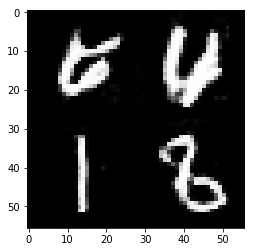

Epoch 7/30... Discriminator Loss: 0.7246... Generator Loss: 1.8777
Epoch 7/30... Discriminator Loss: 0.9081... Generator Loss: 0.7244
Epoch 7/30... Discriminator Loss: 0.8686... Generator Loss: 0.9475
Epoch 7/30... Discriminator Loss: 0.8495... Generator Loss: 0.8115


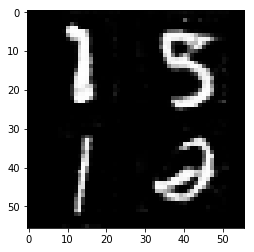

Epoch 7/30... Discriminator Loss: 0.7316... Generator Loss: 1.1980
Epoch 7/30... Discriminator Loss: 1.1048... Generator Loss: 0.6103
Epoch 7/30... Discriminator Loss: 0.8382... Generator Loss: 1.0467
Epoch 7/30... Discriminator Loss: 0.8946... Generator Loss: 0.8122


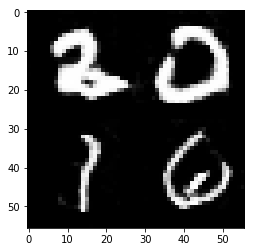

Epoch 7/30... Discriminator Loss: 0.6897... Generator Loss: 1.2501
Epoch 7/30... Discriminator Loss: 1.0877... Generator Loss: 0.6640
Epoch 7/30... Discriminator Loss: 1.0652... Generator Loss: 0.6788
Epoch 8/30... Discriminator Loss: 1.1606... Generator Loss: 0.5331


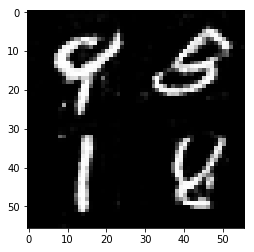

Epoch 8/30... Discriminator Loss: 0.6486... Generator Loss: 1.1252
Epoch 8/30... Discriminator Loss: 0.4154... Generator Loss: 2.3927
Epoch 8/30... Discriminator Loss: 1.3963... Generator Loss: 0.4267
Epoch 8/30... Discriminator Loss: 0.7128... Generator Loss: 1.0756


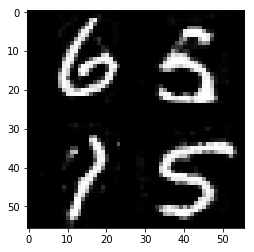

Epoch 8/30... Discriminator Loss: 1.8029... Generator Loss: 2.9714
Epoch 8/30... Discriminator Loss: 0.7447... Generator Loss: 1.1379
Epoch 8/30... Discriminator Loss: 0.6456... Generator Loss: 2.1797
Epoch 8/30... Discriminator Loss: 1.2612... Generator Loss: 0.4749


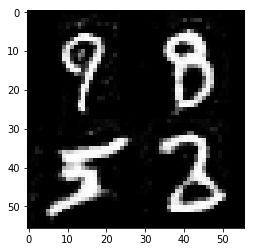

Epoch 8/30... Discriminator Loss: 0.9808... Generator Loss: 0.6912
Epoch 8/30... Discriminator Loss: 0.6922... Generator Loss: 1.8453
Epoch 8/30... Discriminator Loss: 0.8207... Generator Loss: 1.4845
Epoch 8/30... Discriminator Loss: 1.5655... Generator Loss: 0.3424


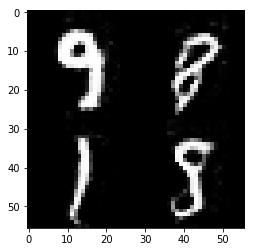

Epoch 8/30... Discriminator Loss: 1.1289... Generator Loss: 0.5699
Epoch 8/30... Discriminator Loss: 0.8173... Generator Loss: 1.6032
Epoch 8/30... Discriminator Loss: 0.7681... Generator Loss: 0.9560
Epoch 8/30... Discriminator Loss: 0.8830... Generator Loss: 0.7778


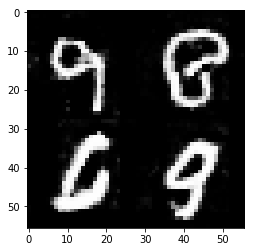

Epoch 8/30... Discriminator Loss: 1.0300... Generator Loss: 1.1743
Epoch 9/30... Discriminator Loss: 0.8315... Generator Loss: 1.5396
Epoch 9/30... Discriminator Loss: 0.9017... Generator Loss: 1.5790
Epoch 9/30... Discriminator Loss: 0.8730... Generator Loss: 0.8260


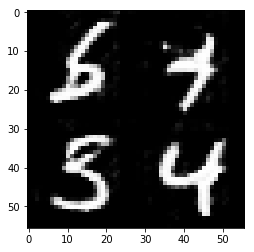

Epoch 9/30... Discriminator Loss: 0.8977... Generator Loss: 0.7264
Epoch 9/30... Discriminator Loss: 0.7903... Generator Loss: 2.0067
Epoch 9/30... Discriminator Loss: 0.7246... Generator Loss: 1.0424
Epoch 9/30... Discriminator Loss: 0.9910... Generator Loss: 0.8022


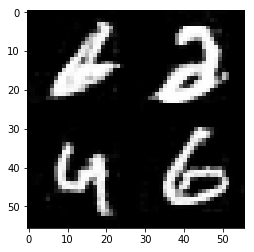

Epoch 9/30... Discriminator Loss: 0.8675... Generator Loss: 0.8481
Epoch 9/30... Discriminator Loss: 0.8864... Generator Loss: 0.7516
Epoch 9/30... Discriminator Loss: 0.6393... Generator Loss: 1.6191
Epoch 9/30... Discriminator Loss: 0.9798... Generator Loss: 0.9207


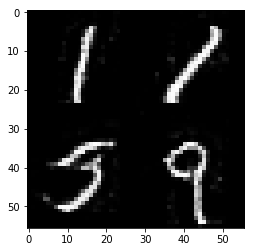

Epoch 9/30... Discriminator Loss: 0.7220... Generator Loss: 0.9443
Epoch 9/30... Discriminator Loss: 0.4112... Generator Loss: 1.6339
Epoch 9/30... Discriminator Loss: 0.8742... Generator Loss: 1.0198
Epoch 9/30... Discriminator Loss: 0.7313... Generator Loss: 1.6201


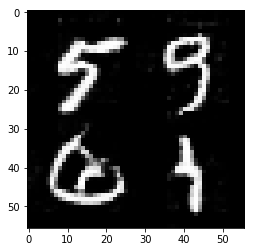

Epoch 9/30... Discriminator Loss: 0.6460... Generator Loss: 1.7820
Epoch 9/30... Discriminator Loss: 0.8687... Generator Loss: 0.8707
Epoch 9/30... Discriminator Loss: 0.6374... Generator Loss: 2.0261
Epoch 9/30... Discriminator Loss: 1.5997... Generator Loss: 0.3316


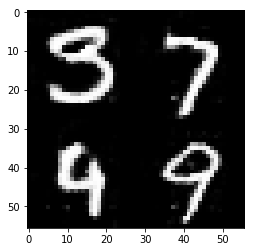

Epoch 10/30... Discriminator Loss: 1.3215... Generator Loss: 0.4279
Epoch 10/30... Discriminator Loss: 0.7322... Generator Loss: 1.4399
Epoch 10/30... Discriminator Loss: 0.6567... Generator Loss: 1.1122
Epoch 10/30... Discriminator Loss: 0.5243... Generator Loss: 1.4466


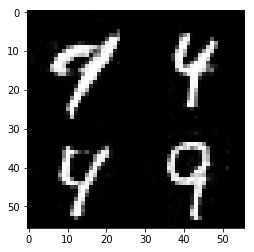

Epoch 10/30... Discriminator Loss: 0.8643... Generator Loss: 0.8161
Epoch 10/30... Discriminator Loss: 0.7228... Generator Loss: 0.9992
Epoch 10/30... Discriminator Loss: 1.1829... Generator Loss: 0.5480
Epoch 10/30... Discriminator Loss: 0.5967... Generator Loss: 1.4598


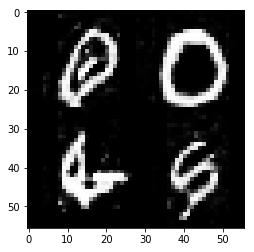

Epoch 10/30... Discriminator Loss: 0.6305... Generator Loss: 2.0661
Epoch 10/30... Discriminator Loss: 0.7731... Generator Loss: 1.3171
Epoch 10/30... Discriminator Loss: 0.6312... Generator Loss: 1.1837
Epoch 10/30... Discriminator Loss: 1.1984... Generator Loss: 2.6230


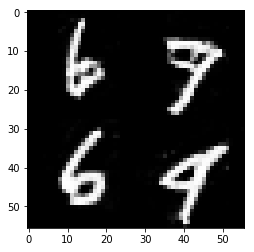

Epoch 10/30... Discriminator Loss: 1.2014... Generator Loss: 0.5446
Epoch 10/30... Discriminator Loss: 0.6685... Generator Loss: 1.3730
Epoch 10/30... Discriminator Loss: 1.1081... Generator Loss: 0.5898
Epoch 10/30... Discriminator Loss: 0.8443... Generator Loss: 0.7809


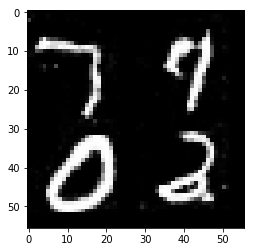

Epoch 10/30... Discriminator Loss: 0.7331... Generator Loss: 1.0219
Epoch 10/30... Discriminator Loss: 0.6072... Generator Loss: 3.4431
Epoch 10/30... Discriminator Loss: 0.5668... Generator Loss: 1.6063
Epoch 11/30... Discriminator Loss: 0.8008... Generator Loss: 1.0248


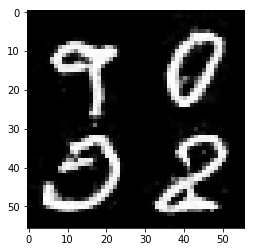

Epoch 11/30... Discriminator Loss: 0.7443... Generator Loss: 1.0874
Epoch 11/30... Discriminator Loss: 0.8683... Generator Loss: 0.8543
Epoch 11/30... Discriminator Loss: 0.8905... Generator Loss: 0.7816
Epoch 11/30... Discriminator Loss: 0.8138... Generator Loss: 1.0066


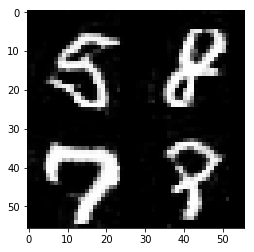

Epoch 11/30... Discriminator Loss: 0.5275... Generator Loss: 1.9392
Epoch 11/30... Discriminator Loss: 0.7067... Generator Loss: 1.1582
Epoch 11/30... Discriminator Loss: 0.8805... Generator Loss: 1.3481
Epoch 11/30... Discriminator Loss: 0.7980... Generator Loss: 0.9114


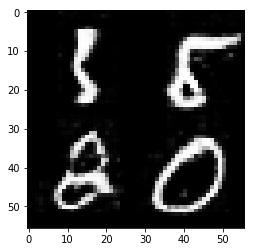

Epoch 11/30... Discriminator Loss: 0.8500... Generator Loss: 0.8360
Epoch 11/30... Discriminator Loss: 0.9000... Generator Loss: 1.1751
Epoch 11/30... Discriminator Loss: 0.7260... Generator Loss: 1.0641
Epoch 11/30... Discriminator Loss: 0.5902... Generator Loss: 1.1819


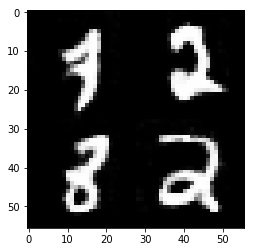

Epoch 11/30... Discriminator Loss: 0.9549... Generator Loss: 0.7582
Epoch 11/30... Discriminator Loss: 0.8851... Generator Loss: 0.8126
Epoch 11/30... Discriminator Loss: 0.6792... Generator Loss: 1.1525
Epoch 11/30... Discriminator Loss: 0.4073... Generator Loss: 2.0055


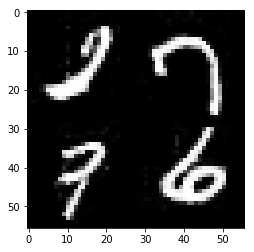

Epoch 11/30... Discriminator Loss: 1.1294... Generator Loss: 0.6640
Epoch 12/30... Discriminator Loss: 0.8469... Generator Loss: 1.0357
Epoch 12/30... Discriminator Loss: 0.9136... Generator Loss: 1.6361
Epoch 12/30... Discriminator Loss: 1.2668... Generator Loss: 0.4968


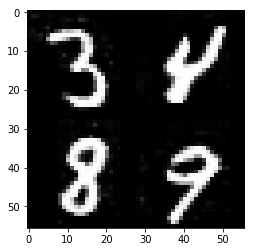

Epoch 12/30... Discriminator Loss: 0.6812... Generator Loss: 1.4677
Epoch 12/30... Discriminator Loss: 0.7151... Generator Loss: 1.0309
Epoch 12/30... Discriminator Loss: 0.5856... Generator Loss: 1.2625
Epoch 12/30... Discriminator Loss: 0.8395... Generator Loss: 0.8386


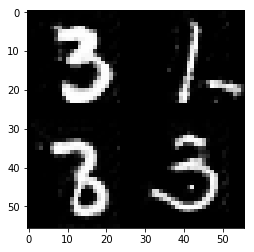

Epoch 12/30... Discriminator Loss: 0.7801... Generator Loss: 0.9218
Epoch 12/30... Discriminator Loss: 0.6110... Generator Loss: 1.3188
Epoch 12/30... Discriminator Loss: 0.7740... Generator Loss: 1.4643
Epoch 12/30... Discriminator Loss: 0.8086... Generator Loss: 0.8377


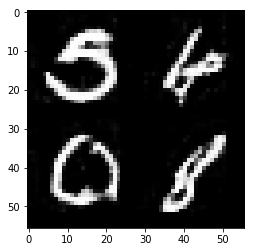

Epoch 12/30... Discriminator Loss: 0.5110... Generator Loss: 1.4540
Epoch 12/30... Discriminator Loss: 0.7112... Generator Loss: 1.1298
Epoch 12/30... Discriminator Loss: 0.7844... Generator Loss: 1.2834
Epoch 12/30... Discriminator Loss: 1.1832... Generator Loss: 0.5798


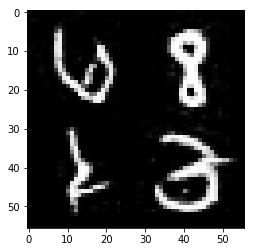

Epoch 12/30... Discriminator Loss: 0.6154... Generator Loss: 1.1912
Epoch 12/30... Discriminator Loss: 0.7792... Generator Loss: 0.9282
Epoch 12/30... Discriminator Loss: 0.6918... Generator Loss: 1.2544
Epoch 12/30... Discriminator Loss: 0.7509... Generator Loss: 1.5940


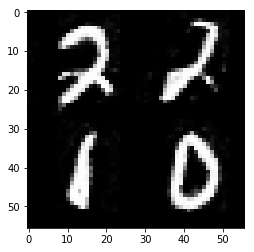

Epoch 13/30... Discriminator Loss: 0.6350... Generator Loss: 1.4152
Epoch 13/30... Discriminator Loss: 0.7171... Generator Loss: 1.1535
Epoch 13/30... Discriminator Loss: 0.6095... Generator Loss: 1.2193
Epoch 13/30... Discriminator Loss: 0.9541... Generator Loss: 0.7427


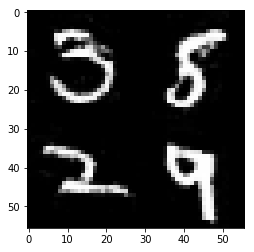

Epoch 13/30... Discriminator Loss: 0.7396... Generator Loss: 1.0254
Epoch 13/30... Discriminator Loss: 0.5876... Generator Loss: 1.2600
Epoch 13/30... Discriminator Loss: 0.9500... Generator Loss: 0.7407
Epoch 13/30... Discriminator Loss: 0.5973... Generator Loss: 1.4114


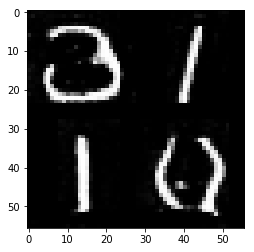

Epoch 13/30... Discriminator Loss: 0.7616... Generator Loss: 1.0031
Epoch 13/30... Discriminator Loss: 1.3378... Generator Loss: 0.4801
Epoch 13/30... Discriminator Loss: 0.6220... Generator Loss: 1.1706
Epoch 13/30... Discriminator Loss: 0.6744... Generator Loss: 1.0543


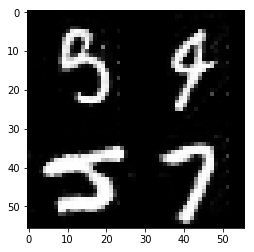

Epoch 13/30... Discriminator Loss: 0.7337... Generator Loss: 0.9333
Epoch 13/30... Discriminator Loss: 0.7822... Generator Loss: 1.9991
Epoch 13/30... Discriminator Loss: 0.7907... Generator Loss: 2.1060
Epoch 13/30... Discriminator Loss: 0.6182... Generator Loss: 1.3757


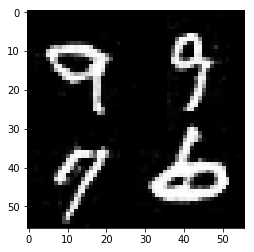

Epoch 13/30... Discriminator Loss: 0.8908... Generator Loss: 1.2363
Epoch 13/30... Discriminator Loss: 0.4636... Generator Loss: 2.5019
Epoch 13/30... Discriminator Loss: 0.8300... Generator Loss: 1.1769
Epoch 14/30... Discriminator Loss: 0.8487... Generator Loss: 1.5224


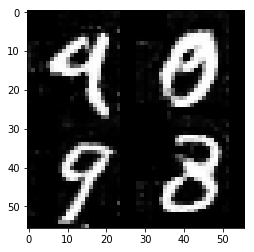

Epoch 14/30... Discriminator Loss: 0.9897... Generator Loss: 0.7041
Epoch 14/30... Discriminator Loss: 1.2827... Generator Loss: 0.4889
Epoch 14/30... Discriminator Loss: 0.9210... Generator Loss: 0.7817
Epoch 14/30... Discriminator Loss: 0.3449... Generator Loss: 1.9103


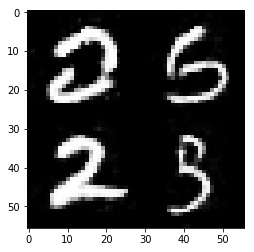

Epoch 14/30... Discriminator Loss: 0.5042... Generator Loss: 1.9031
Epoch 14/30... Discriminator Loss: 0.7802... Generator Loss: 1.1058
Epoch 14/30... Discriminator Loss: 1.0235... Generator Loss: 0.7117
Epoch 14/30... Discriminator Loss: 0.7150... Generator Loss: 1.2926


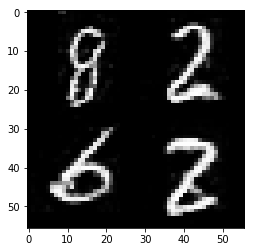

Epoch 14/30... Discriminator Loss: 0.6761... Generator Loss: 1.6368
Epoch 14/30... Discriminator Loss: 0.5582... Generator Loss: 1.3735
Epoch 14/30... Discriminator Loss: 0.4521... Generator Loss: 1.9084
Epoch 14/30... Discriminator Loss: 1.0383... Generator Loss: 0.7817


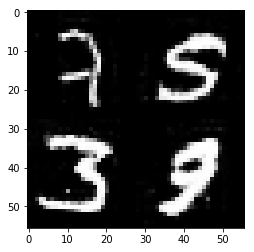

Epoch 14/30... Discriminator Loss: 0.8346... Generator Loss: 1.4540
Epoch 14/30... Discriminator Loss: 1.2232... Generator Loss: 0.5716
Epoch 14/30... Discriminator Loss: 0.6810... Generator Loss: 1.4664
Epoch 14/30... Discriminator Loss: 0.8097... Generator Loss: 0.8453


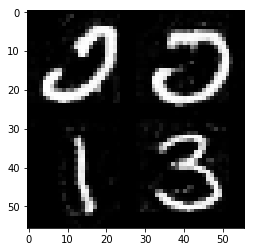

Epoch 14/30... Discriminator Loss: 0.8703... Generator Loss: 1.1637
Epoch 14/30... Discriminator Loss: 0.6431... Generator Loss: 1.2605
Epoch 15/30... Discriminator Loss: 0.6626... Generator Loss: 1.1921
Epoch 15/30... Discriminator Loss: 0.7644... Generator Loss: 1.0439


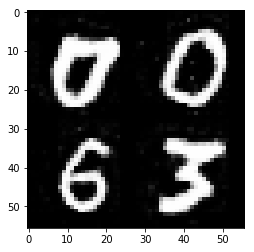

Epoch 15/30... Discriminator Loss: 1.0415... Generator Loss: 0.7655
Epoch 15/30... Discriminator Loss: 0.5670... Generator Loss: 1.5223
Epoch 15/30... Discriminator Loss: 0.7899... Generator Loss: 1.4551
Epoch 15/30... Discriminator Loss: 1.0181... Generator Loss: 0.7024


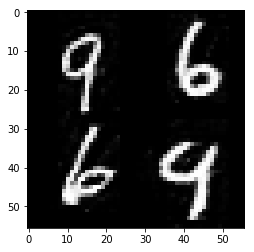

Epoch 15/30... Discriminator Loss: 0.6170... Generator Loss: 1.1261
Epoch 15/30... Discriminator Loss: 0.7905... Generator Loss: 1.0526
Epoch 15/30... Discriminator Loss: 0.4135... Generator Loss: 1.5455
Epoch 15/30... Discriminator Loss: 0.6112... Generator Loss: 1.5634


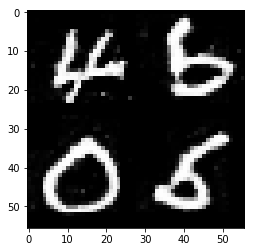

Epoch 15/30... Discriminator Loss: 0.7374... Generator Loss: 1.0447
Epoch 15/30... Discriminator Loss: 1.0816... Generator Loss: 0.6666
Epoch 15/30... Discriminator Loss: 0.4042... Generator Loss: 1.7795
Epoch 15/30... Discriminator Loss: 0.5650... Generator Loss: 1.9792


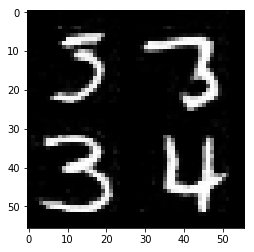

Epoch 15/30... Discriminator Loss: 1.2426... Generator Loss: 0.5487
Epoch 15/30... Discriminator Loss: 0.6725... Generator Loss: 1.1642
Epoch 15/30... Discriminator Loss: 0.8540... Generator Loss: 0.9440
Epoch 15/30... Discriminator Loss: 1.2814... Generator Loss: 0.5157


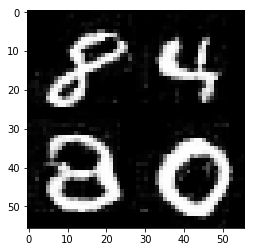

Epoch 16/30... Discriminator Loss: 0.9384... Generator Loss: 1.6016
Epoch 16/30... Discriminator Loss: 0.8068... Generator Loss: 1.0119
Epoch 16/30... Discriminator Loss: 0.6598... Generator Loss: 1.0892
Epoch 16/30... Discriminator Loss: 1.0663... Generator Loss: 0.6165


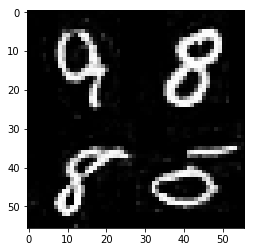

Epoch 16/30... Discriminator Loss: 0.8281... Generator Loss: 0.8762
Epoch 16/30... Discriminator Loss: 0.8113... Generator Loss: 0.9104
Epoch 16/30... Discriminator Loss: 1.1116... Generator Loss: 2.0571
Epoch 16/30... Discriminator Loss: 0.8137... Generator Loss: 0.9645


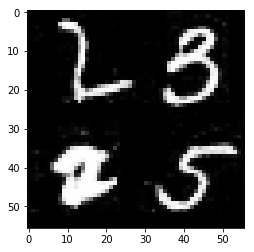

Epoch 16/30... Discriminator Loss: 0.8701... Generator Loss: 0.8584
Epoch 16/30... Discriminator Loss: 1.3050... Generator Loss: 0.5665
Epoch 16/30... Discriminator Loss: 1.1623... Generator Loss: 0.6264
Epoch 16/30... Discriminator Loss: 0.5682... Generator Loss: 1.2627


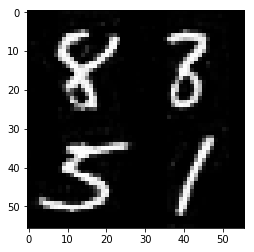

Epoch 16/30... Discriminator Loss: 0.6190... Generator Loss: 1.3146
Epoch 16/30... Discriminator Loss: 0.5827... Generator Loss: 1.2404
Epoch 16/30... Discriminator Loss: 0.9160... Generator Loss: 1.1438
Epoch 16/30... Discriminator Loss: 0.5946... Generator Loss: 1.1656


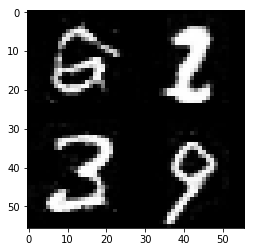

Epoch 16/30... Discriminator Loss: 1.5676... Generator Loss: 0.4456
Epoch 16/30... Discriminator Loss: 0.6540... Generator Loss: 1.5450
Epoch 16/30... Discriminator Loss: 0.6530... Generator Loss: 1.0538
Epoch 17/30... Discriminator Loss: 0.8499... Generator Loss: 0.9118


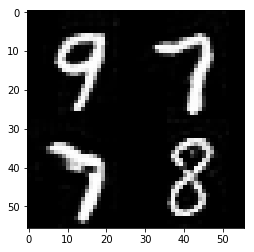

Epoch 17/30... Discriminator Loss: 0.6306... Generator Loss: 1.3780
Epoch 17/30... Discriminator Loss: 0.7793... Generator Loss: 0.8710
Epoch 17/30... Discriminator Loss: 0.3712... Generator Loss: 1.7396
Epoch 17/30... Discriminator Loss: 0.4861... Generator Loss: 1.4154


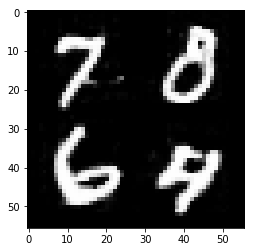

Epoch 17/30... Discriminator Loss: 0.7376... Generator Loss: 0.9307
Epoch 17/30... Discriminator Loss: 0.5138... Generator Loss: 2.7092
Epoch 17/30... Discriminator Loss: 0.7895... Generator Loss: 0.8561
Epoch 17/30... Discriminator Loss: 1.6326... Generator Loss: 0.3234


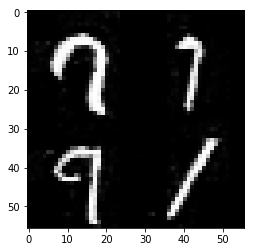

Epoch 17/30... Discriminator Loss: 0.6036... Generator Loss: 1.3197
Epoch 17/30... Discriminator Loss: 0.9192... Generator Loss: 2.5081
Epoch 17/30... Discriminator Loss: 0.8229... Generator Loss: 1.1169
Epoch 17/30... Discriminator Loss: 0.9512... Generator Loss: 2.2376


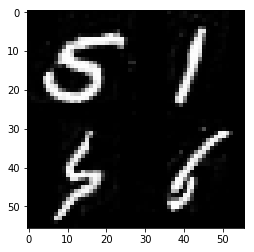

Epoch 17/30... Discriminator Loss: 0.6531... Generator Loss: 1.0805
Epoch 17/30... Discriminator Loss: 0.8458... Generator Loss: 0.8112
Epoch 17/30... Discriminator Loss: 0.6548... Generator Loss: 1.2631
Epoch 17/30... Discriminator Loss: 0.9191... Generator Loss: 0.8553


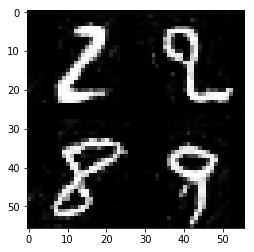

Epoch 17/30... Discriminator Loss: 1.0767... Generator Loss: 0.6662
Epoch 17/30... Discriminator Loss: 0.9956... Generator Loss: 0.7015
Epoch 18/30... Discriminator Loss: 0.7366... Generator Loss: 1.2241
Epoch 18/30... Discriminator Loss: 0.6151... Generator Loss: 1.2367


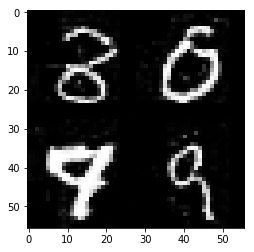

Epoch 18/30... Discriminator Loss: 0.6678... Generator Loss: 1.0646
Epoch 18/30... Discriminator Loss: 0.8072... Generator Loss: 0.9144
Epoch 18/30... Discriminator Loss: 0.4864... Generator Loss: 1.4322
Epoch 18/30... Discriminator Loss: 0.9875... Generator Loss: 1.6474


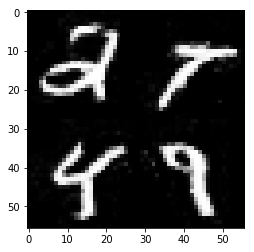

Epoch 18/30... Discriminator Loss: 0.9732... Generator Loss: 0.7866
Epoch 18/30... Discriminator Loss: 0.7614... Generator Loss: 1.0293
Epoch 18/30... Discriminator Loss: 1.0128... Generator Loss: 0.6492
Epoch 18/30... Discriminator Loss: 0.6762... Generator Loss: 1.4692


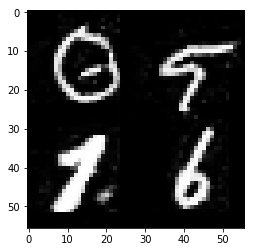

Epoch 18/30... Discriminator Loss: 0.9148... Generator Loss: 0.8030
Epoch 18/30... Discriminator Loss: 0.6926... Generator Loss: 0.9954
Epoch 18/30... Discriminator Loss: 0.6874... Generator Loss: 1.0016
Epoch 18/30... Discriminator Loss: 0.6780... Generator Loss: 1.1857


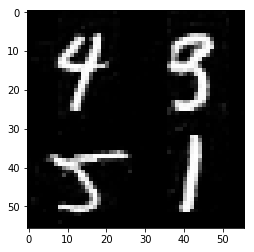

Epoch 18/30... Discriminator Loss: 0.8634... Generator Loss: 0.8017
Epoch 18/30... Discriminator Loss: 0.7210... Generator Loss: 1.0607
Epoch 18/30... Discriminator Loss: 0.5646... Generator Loss: 1.3508
Epoch 18/30... Discriminator Loss: 0.7322... Generator Loss: 3.1500


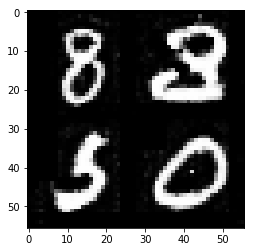

Epoch 19/30... Discriminator Loss: 0.8036... Generator Loss: 0.8609
Epoch 19/30... Discriminator Loss: 0.8387... Generator Loss: 1.7069
Epoch 19/30... Discriminator Loss: 0.9216... Generator Loss: 0.8132
Epoch 19/30... Discriminator Loss: 1.0996... Generator Loss: 0.6468


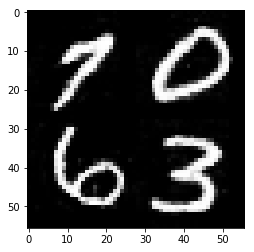

Epoch 19/30... Discriminator Loss: 0.4491... Generator Loss: 1.7366
Epoch 19/30... Discriminator Loss: 0.5089... Generator Loss: 1.5535
Epoch 19/30... Discriminator Loss: 0.6795... Generator Loss: 1.0688
Epoch 19/30... Discriminator Loss: 1.5261... Generator Loss: 0.4135


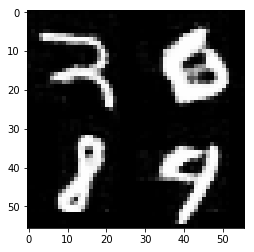

Epoch 19/30... Discriminator Loss: 1.2500... Generator Loss: 0.5286
Epoch 19/30... Discriminator Loss: 0.7150... Generator Loss: 1.0924
Epoch 19/30... Discriminator Loss: 0.6046... Generator Loss: 1.1700
Epoch 19/30... Discriminator Loss: 0.7949... Generator Loss: 0.8667


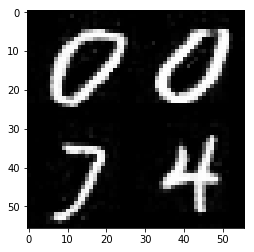

Epoch 19/30... Discriminator Loss: 0.9892... Generator Loss: 0.8406
Epoch 19/30... Discriminator Loss: 0.4782... Generator Loss: 1.7267
Epoch 19/30... Discriminator Loss: 0.8796... Generator Loss: 0.9311
Epoch 19/30... Discriminator Loss: 0.4467... Generator Loss: 1.4953


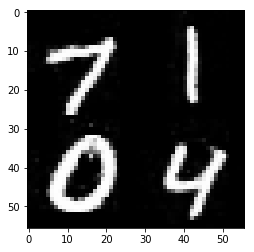

Epoch 19/30... Discriminator Loss: 0.5204... Generator Loss: 1.3392
Epoch 19/30... Discriminator Loss: 0.3780... Generator Loss: 1.8088
Epoch 19/30... Discriminator Loss: 0.8315... Generator Loss: 0.8765
Epoch 20/30... Discriminator Loss: 0.7481... Generator Loss: 0.9473


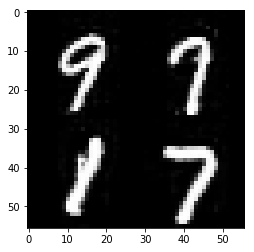

Epoch 20/30... Discriminator Loss: 1.1083... Generator Loss: 0.6321
Epoch 20/30... Discriminator Loss: 0.8359... Generator Loss: 0.8808
Epoch 20/30... Discriminator Loss: 0.9350... Generator Loss: 0.7838
Epoch 20/30... Discriminator Loss: 0.8332... Generator Loss: 0.8545


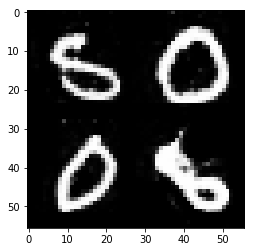

Epoch 20/30... Discriminator Loss: 2.2115... Generator Loss: 0.2136
Epoch 20/30... Discriminator Loss: 0.7492... Generator Loss: 1.4212
Epoch 20/30... Discriminator Loss: 1.1609... Generator Loss: 0.7376
Epoch 20/30... Discriminator Loss: 0.7267... Generator Loss: 1.0857


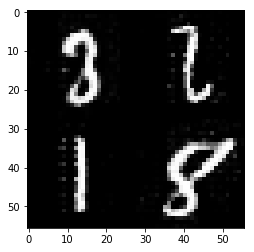

Epoch 20/30... Discriminator Loss: 0.7451... Generator Loss: 1.7209
Epoch 20/30... Discriminator Loss: 0.6178... Generator Loss: 1.2971
Epoch 20/30... Discriminator Loss: 1.0041... Generator Loss: 0.7764
Epoch 20/30... Discriminator Loss: 1.0216... Generator Loss: 0.6588


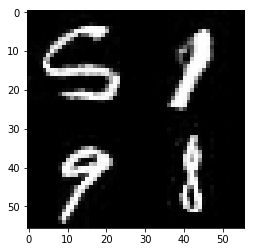

Epoch 20/30... Discriminator Loss: 0.5280... Generator Loss: 1.4003
Epoch 20/30... Discriminator Loss: 1.9387... Generator Loss: 0.4820
Epoch 20/30... Discriminator Loss: 1.0348... Generator Loss: 0.6762
Epoch 20/30... Discriminator Loss: 0.7231... Generator Loss: 0.9628


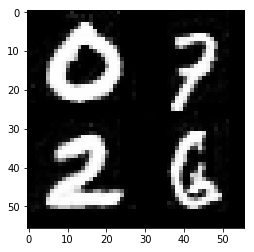

Epoch 20/30... Discriminator Loss: 0.6789... Generator Loss: 1.0898
Epoch 20/30... Discriminator Loss: 0.9087... Generator Loss: 0.8157
Epoch 21/30... Discriminator Loss: 1.1981... Generator Loss: 0.5450
Epoch 21/30... Discriminator Loss: 0.8389... Generator Loss: 0.8389


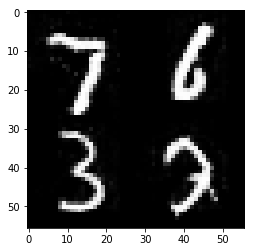

Epoch 21/30... Discriminator Loss: 0.6950... Generator Loss: 1.3142
Epoch 21/30... Discriminator Loss: 0.7179... Generator Loss: 1.4484
Epoch 21/30... Discriminator Loss: 0.6636... Generator Loss: 1.1689
Epoch 21/30... Discriminator Loss: 1.0327... Generator Loss: 0.6623


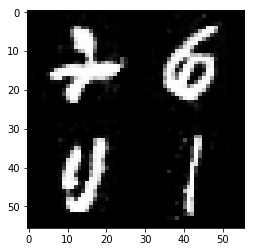

Epoch 21/30... Discriminator Loss: 1.0535... Generator Loss: 0.6456
Epoch 21/30... Discriminator Loss: 0.9486... Generator Loss: 0.7095
Epoch 21/30... Discriminator Loss: 1.0023... Generator Loss: 0.7203
Epoch 21/30... Discriminator Loss: 0.7716... Generator Loss: 0.9533


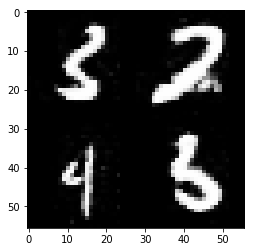

Epoch 21/30... Discriminator Loss: 0.7123... Generator Loss: 1.1774
Epoch 21/30... Discriminator Loss: 0.6200... Generator Loss: 1.3373
Epoch 21/30... Discriminator Loss: 0.8238... Generator Loss: 0.9616
Epoch 21/30... Discriminator Loss: 1.2032... Generator Loss: 0.5298


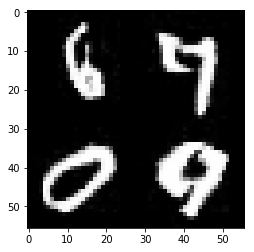

Epoch 21/30... Discriminator Loss: 1.3680... Generator Loss: 0.4453
Epoch 21/30... Discriminator Loss: 1.3735... Generator Loss: 2.1223
Epoch 21/30... Discriminator Loss: 1.0912... Generator Loss: 0.6127
Epoch 21/30... Discriminator Loss: 0.4283... Generator Loss: 1.5518


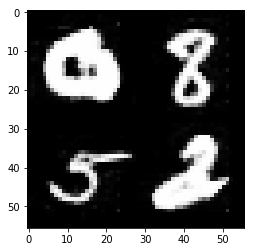

Epoch 21/30... Discriminator Loss: 0.8841... Generator Loss: 0.8072
Epoch 22/30... Discriminator Loss: 0.7655... Generator Loss: 1.3476
Epoch 22/30... Discriminator Loss: 0.6694... Generator Loss: 1.4775
Epoch 22/30... Discriminator Loss: 1.0884... Generator Loss: 0.6377


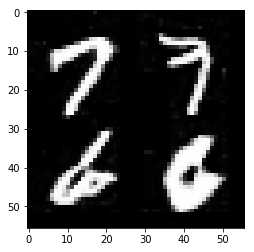

Epoch 22/30... Discriminator Loss: 0.6422... Generator Loss: 1.1132
Epoch 22/30... Discriminator Loss: 0.7299... Generator Loss: 1.2595
Epoch 22/30... Discriminator Loss: 0.7925... Generator Loss: 2.2683
Epoch 22/30... Discriminator Loss: 0.8914... Generator Loss: 0.9923


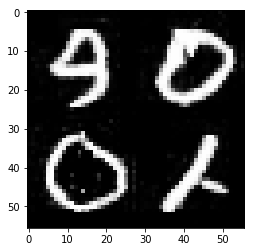

Epoch 22/30... Discriminator Loss: 0.5153... Generator Loss: 2.1510
Epoch 22/30... Discriminator Loss: 0.5044... Generator Loss: 1.4639
Epoch 22/30... Discriminator Loss: 0.6430... Generator Loss: 1.1988
Epoch 22/30... Discriminator Loss: 0.5686... Generator Loss: 1.3595


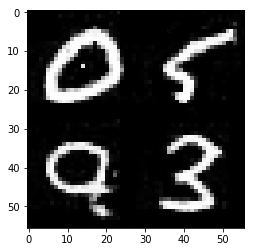

Epoch 22/30... Discriminator Loss: 0.5885... Generator Loss: 4.0115
Epoch 22/30... Discriminator Loss: 0.9288... Generator Loss: 0.7406
Epoch 22/30... Discriminator Loss: 0.8402... Generator Loss: 1.0963
Epoch 22/30... Discriminator Loss: 0.7707... Generator Loss: 0.9559


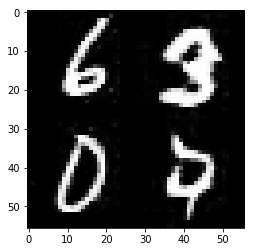

Epoch 22/30... Discriminator Loss: 0.6662... Generator Loss: 1.1258
Epoch 22/30... Discriminator Loss: 1.0376... Generator Loss: 0.7548
Epoch 22/30... Discriminator Loss: 0.6947... Generator Loss: 1.2328
Epoch 23/30... Discriminator Loss: 0.4626... Generator Loss: 1.8306


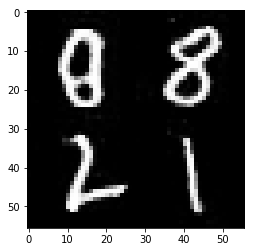

Epoch 23/30... Discriminator Loss: 0.4301... Generator Loss: 1.6196
Epoch 23/30... Discriminator Loss: 0.8992... Generator Loss: 1.9601
Epoch 23/30... Discriminator Loss: 0.8312... Generator Loss: 0.8168
Epoch 23/30... Discriminator Loss: 0.6541... Generator Loss: 1.1243


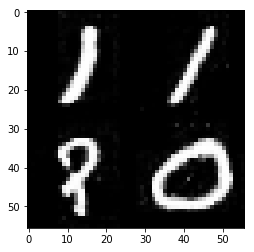

Epoch 23/30... Discriminator Loss: 1.7165... Generator Loss: 3.0123
Epoch 23/30... Discriminator Loss: 0.9787... Generator Loss: 1.8636
Epoch 23/30... Discriminator Loss: 0.7017... Generator Loss: 2.2154
Epoch 23/30... Discriminator Loss: 0.7588... Generator Loss: 0.9606


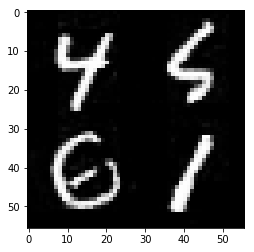

Epoch 23/30... Discriminator Loss: 0.8504... Generator Loss: 0.8729
Epoch 23/30... Discriminator Loss: 0.5077... Generator Loss: 1.3284
Epoch 23/30... Discriminator Loss: 0.5835... Generator Loss: 1.1845
Epoch 23/30... Discriminator Loss: 1.2001... Generator Loss: 0.6997


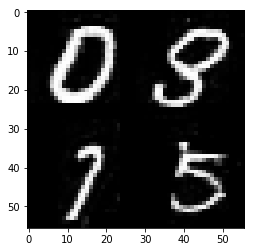

Epoch 23/30... Discriminator Loss: 0.8096... Generator Loss: 0.9564
Epoch 23/30... Discriminator Loss: 1.1366... Generator Loss: 0.6994
Epoch 23/30... Discriminator Loss: 0.7291... Generator Loss: 1.0724
Epoch 23/30... Discriminator Loss: 0.6223... Generator Loss: 1.2308


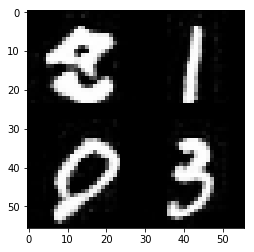

Epoch 23/30... Discriminator Loss: 1.9071... Generator Loss: 0.2996
Epoch 23/30... Discriminator Loss: 0.6665... Generator Loss: 1.0560
Epoch 24/30... Discriminator Loss: 1.1711... Generator Loss: 1.8323
Epoch 24/30... Discriminator Loss: 0.7419... Generator Loss: 0.8997


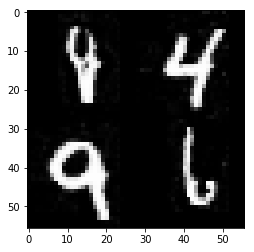

Epoch 24/30... Discriminator Loss: 1.0828... Generator Loss: 0.6621
Epoch 24/30... Discriminator Loss: 0.9487... Generator Loss: 0.8014
Epoch 24/30... Discriminator Loss: 0.6149... Generator Loss: 1.4241
Epoch 24/30... Discriminator Loss: 1.0150... Generator Loss: 0.7606


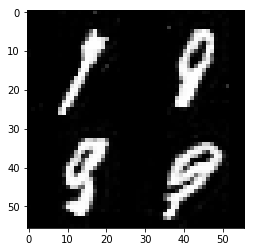

Epoch 24/30... Discriminator Loss: 0.6107... Generator Loss: 1.2295
Epoch 24/30... Discriminator Loss: 0.7311... Generator Loss: 0.9380
Epoch 24/30... Discriminator Loss: 0.5374... Generator Loss: 1.2776
Epoch 24/30... Discriminator Loss: 0.5861... Generator Loss: 1.5234


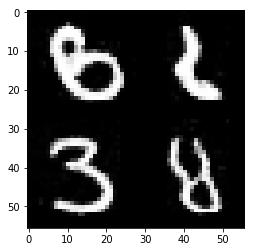

Epoch 24/30... Discriminator Loss: 0.8507... Generator Loss: 0.8507
Epoch 24/30... Discriminator Loss: 0.5904... Generator Loss: 1.2165
Epoch 24/30... Discriminator Loss: 1.2900... Generator Loss: 0.4906
Epoch 24/30... Discriminator Loss: 0.6082... Generator Loss: 1.9466


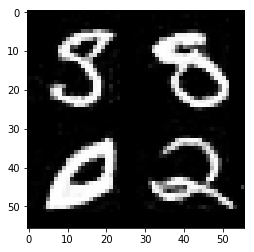

Epoch 24/30... Discriminator Loss: 0.4105... Generator Loss: 1.7584
Epoch 24/30... Discriminator Loss: 3.7969... Generator Loss: 4.7312
Epoch 24/30... Discriminator Loss: 0.7696... Generator Loss: 1.0738
Epoch 24/30... Discriminator Loss: 1.7995... Generator Loss: 4.2095


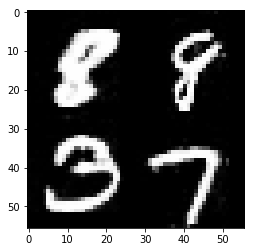

Epoch 24/30... Discriminator Loss: 1.0367... Generator Loss: 0.6839
Epoch 25/30... Discriminator Loss: 1.4487... Generator Loss: 0.4827
Epoch 25/30... Discriminator Loss: 1.2825... Generator Loss: 0.4771
Epoch 25/30... Discriminator Loss: 0.8857... Generator Loss: 1.1210


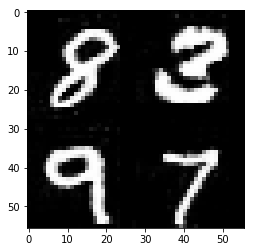

Epoch 25/30... Discriminator Loss: 0.9575... Generator Loss: 0.7584
Epoch 25/30... Discriminator Loss: 0.4333... Generator Loss: 1.5680
Epoch 25/30... Discriminator Loss: 0.7453... Generator Loss: 1.1645
Epoch 25/30... Discriminator Loss: 0.5984... Generator Loss: 1.8300


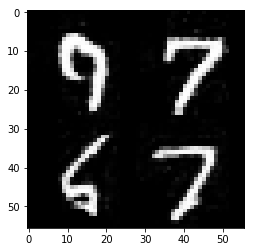

Epoch 25/30... Discriminator Loss: 0.4243... Generator Loss: 1.7786
Epoch 25/30... Discriminator Loss: 0.5164... Generator Loss: 1.4942
Epoch 25/30... Discriminator Loss: 0.4535... Generator Loss: 1.7365
Epoch 25/30... Discriminator Loss: 0.5430... Generator Loss: 1.1640


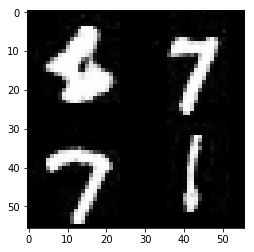

Epoch 25/30... Discriminator Loss: 0.6283... Generator Loss: 1.1726
Epoch 25/30... Discriminator Loss: 1.0269... Generator Loss: 0.8841
Epoch 25/30... Discriminator Loss: 0.6240... Generator Loss: 1.4251
Epoch 25/30... Discriminator Loss: 0.6233... Generator Loss: 1.4137


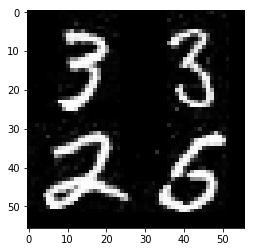

Epoch 25/30... Discriminator Loss: 1.0403... Generator Loss: 0.7086
Epoch 25/30... Discriminator Loss: 0.6859... Generator Loss: 0.9832
Epoch 25/30... Discriminator Loss: 0.8126... Generator Loss: 1.2325
Epoch 25/30... Discriminator Loss: 0.4527... Generator Loss: 1.7139


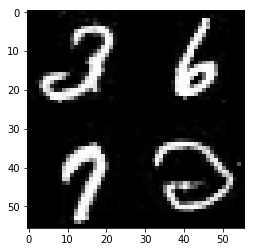

Epoch 26/30... Discriminator Loss: 0.9750... Generator Loss: 1.5420
Epoch 26/30... Discriminator Loss: 0.7775... Generator Loss: 0.9883
Epoch 26/30... Discriminator Loss: 0.7469... Generator Loss: 0.9592
Epoch 26/30... Discriminator Loss: 0.4997... Generator Loss: 1.6497


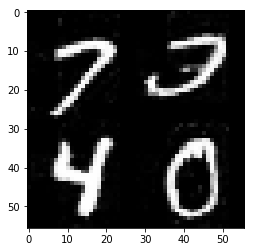

Epoch 26/30... Discriminator Loss: 0.6150... Generator Loss: 1.1337
Epoch 26/30... Discriminator Loss: 0.6762... Generator Loss: 1.2718
Epoch 26/30... Discriminator Loss: 1.0610... Generator Loss: 0.7079
Epoch 26/30... Discriminator Loss: 0.6348... Generator Loss: 1.2241


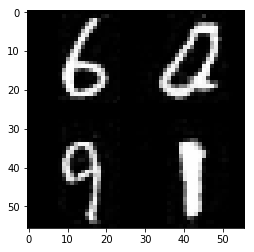

Epoch 26/30... Discriminator Loss: 0.9677... Generator Loss: 0.7467
Epoch 26/30... Discriminator Loss: 0.4467... Generator Loss: 1.5780
Epoch 26/30... Discriminator Loss: 0.7545... Generator Loss: 1.0232
Epoch 26/30... Discriminator Loss: 0.7041... Generator Loss: 0.9886


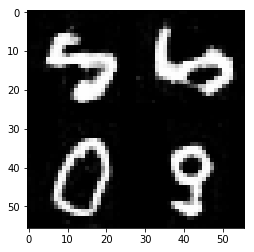

Epoch 26/30... Discriminator Loss: 1.1901... Generator Loss: 0.5138
Epoch 26/30... Discriminator Loss: 1.0114... Generator Loss: 0.7489
Epoch 26/30... Discriminator Loss: 0.5347... Generator Loss: 1.3661
Epoch 26/30... Discriminator Loss: 0.4676... Generator Loss: 1.4813


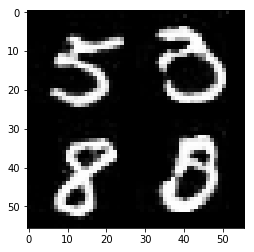

Epoch 26/30... Discriminator Loss: 0.7333... Generator Loss: 1.0125
Epoch 26/30... Discriminator Loss: 0.4884... Generator Loss: 2.1004
Epoch 27/30... Discriminator Loss: 0.4273... Generator Loss: 1.5997
Epoch 27/30... Discriminator Loss: 1.6489... Generator Loss: 0.3778


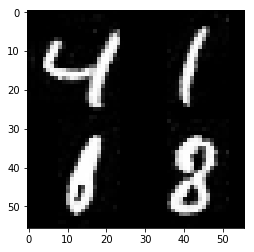

Epoch 27/30... Discriminator Loss: 0.6104... Generator Loss: 1.4184
Epoch 27/30... Discriminator Loss: 0.7095... Generator Loss: 0.9374
Epoch 27/30... Discriminator Loss: 0.8912... Generator Loss: 0.8266
Epoch 27/30... Discriminator Loss: 0.3857... Generator Loss: 1.9206


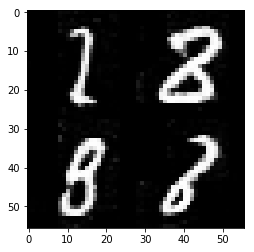

Epoch 27/30... Discriminator Loss: 0.7779... Generator Loss: 0.9300
Epoch 27/30... Discriminator Loss: 1.2673... Generator Loss: 0.5641
Epoch 27/30... Discriminator Loss: 0.8013... Generator Loss: 0.9140
Epoch 27/30... Discriminator Loss: 0.7928... Generator Loss: 0.9799


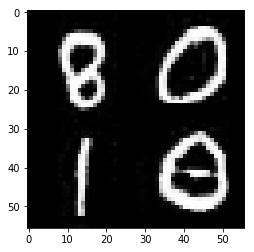

Epoch 27/30... Discriminator Loss: 0.6731... Generator Loss: 1.1100
Epoch 27/30... Discriminator Loss: 0.8747... Generator Loss: 0.8443
Epoch 27/30... Discriminator Loss: 2.1624... Generator Loss: 0.3423
Epoch 27/30... Discriminator Loss: 0.4981... Generator Loss: 2.3902


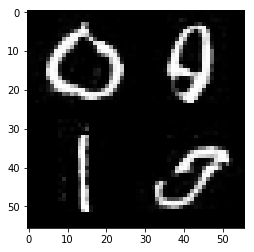

Epoch 27/30... Discriminator Loss: 0.8022... Generator Loss: 0.9505
Epoch 27/30... Discriminator Loss: 0.7282... Generator Loss: 0.9946
Epoch 27/30... Discriminator Loss: 0.4960... Generator Loss: 1.5053
Epoch 27/30... Discriminator Loss: 0.4118... Generator Loss: 2.0846


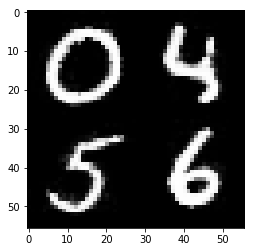

Epoch 27/30... Discriminator Loss: 1.0641... Generator Loss: 0.6261
Epoch 28/30... Discriminator Loss: 0.5470... Generator Loss: 1.5929
Epoch 28/30... Discriminator Loss: 0.6302... Generator Loss: 1.2783
Epoch 28/30... Discriminator Loss: 0.6233... Generator Loss: 1.1718


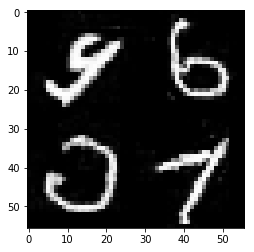

Epoch 28/30... Discriminator Loss: 0.6694... Generator Loss: 1.0535
Epoch 28/30... Discriminator Loss: 0.7793... Generator Loss: 0.9929
Epoch 28/30... Discriminator Loss: 0.7955... Generator Loss: 0.9791
Epoch 28/30... Discriminator Loss: 0.7818... Generator Loss: 2.3442


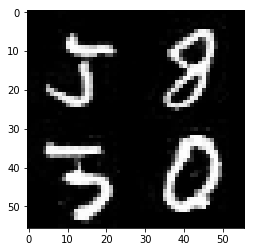

Epoch 28/30... Discriminator Loss: 0.9007... Generator Loss: 0.7914
Epoch 28/30... Discriminator Loss: 0.7789... Generator Loss: 1.0693
Epoch 28/30... Discriminator Loss: 0.5629... Generator Loss: 1.3026
Epoch 28/30... Discriminator Loss: 0.6822... Generator Loss: 1.0622


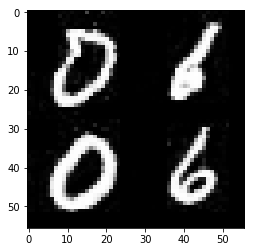

Epoch 28/30... Discriminator Loss: 0.6079... Generator Loss: 1.5962
Epoch 28/30... Discriminator Loss: 0.8502... Generator Loss: 1.0134
Epoch 28/30... Discriminator Loss: 0.6938... Generator Loss: 1.2450
Epoch 28/30... Discriminator Loss: 0.6080... Generator Loss: 1.6633


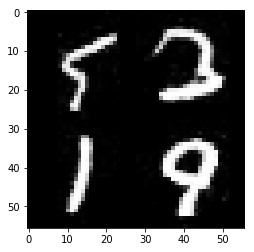

Epoch 28/30... Discriminator Loss: 0.9319... Generator Loss: 0.7607
Epoch 28/30... Discriminator Loss: 0.3639... Generator Loss: 1.7295
Epoch 28/30... Discriminator Loss: 0.5316... Generator Loss: 1.2748
Epoch 28/30... Discriminator Loss: 1.6094... Generator Loss: 0.3436


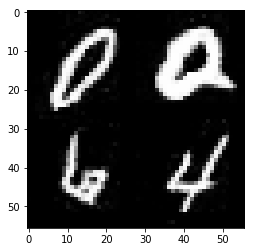

Epoch 29/30... Discriminator Loss: 1.1072... Generator Loss: 0.7354
Epoch 29/30... Discriminator Loss: 0.4165... Generator Loss: 1.6630
Epoch 29/30... Discriminator Loss: 0.7683... Generator Loss: 0.9426
Epoch 29/30... Discriminator Loss: 0.4984... Generator Loss: 1.2850


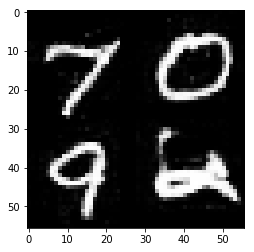

Epoch 29/30... Discriminator Loss: 1.3353... Generator Loss: 0.4699
Epoch 29/30... Discriminator Loss: 0.9705... Generator Loss: 0.7892
Epoch 29/30... Discriminator Loss: 0.4604... Generator Loss: 1.8751
Epoch 29/30... Discriminator Loss: 0.5340... Generator Loss: 1.3985


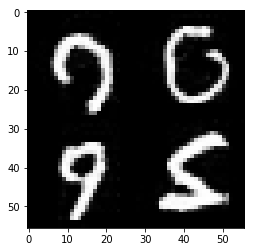

Epoch 29/30... Discriminator Loss: 0.3777... Generator Loss: 1.5415
Epoch 29/30... Discriminator Loss: 1.1293... Generator Loss: 2.8372
Epoch 29/30... Discriminator Loss: 0.6256... Generator Loss: 1.4916
Epoch 29/30... Discriminator Loss: 0.4485... Generator Loss: 1.5349


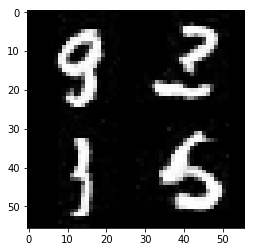

Epoch 29/30... Discriminator Loss: 1.0430... Generator Loss: 0.6215
Epoch 29/30... Discriminator Loss: 1.1393... Generator Loss: 0.6072
Epoch 29/30... Discriminator Loss: 0.6318... Generator Loss: 1.2136
Epoch 29/30... Discriminator Loss: 0.9749... Generator Loss: 0.7291


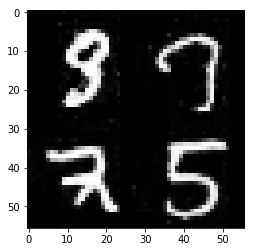

Epoch 29/30... Discriminator Loss: 1.5398... Generator Loss: 0.3906
Epoch 29/30... Discriminator Loss: 0.5969... Generator Loss: 1.2492
Epoch 30/30... Discriminator Loss: 0.5118... Generator Loss: 1.7483
Epoch 30/30... Discriminator Loss: 0.5108... Generator Loss: 1.4155


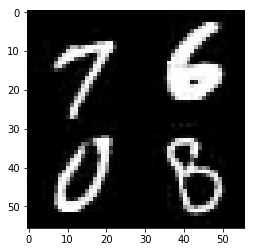

Epoch 30/30... Discriminator Loss: 1.2102... Generator Loss: 0.5735
Epoch 30/30... Discriminator Loss: 0.4712... Generator Loss: 1.5165
Epoch 30/30... Discriminator Loss: 1.0489... Generator Loss: 0.7270
Epoch 30/30... Discriminator Loss: 0.6612... Generator Loss: 1.5674


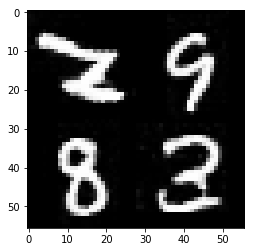

Epoch 30/30... Discriminator Loss: 0.7605... Generator Loss: 1.0432
Epoch 30/30... Discriminator Loss: 0.8421... Generator Loss: 0.8571
Epoch 30/30... Discriminator Loss: 0.6566... Generator Loss: 1.1780
Epoch 30/30... Discriminator Loss: 2.1418... Generator Loss: 0.2929


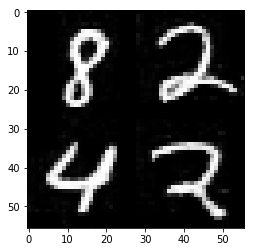

Epoch 30/30... Discriminator Loss: 0.8337... Generator Loss: 0.8331
Epoch 30/30... Discriminator Loss: 0.8330... Generator Loss: 0.9276
Epoch 30/30... Discriminator Loss: 0.7228... Generator Loss: 1.0898
Epoch 30/30... Discriminator Loss: 0.5413... Generator Loss: 1.2709


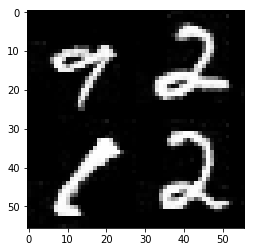

Epoch 30/30... Discriminator Loss: 0.6651... Generator Loss: 3.1004
Epoch 30/30... Discriminator Loss: 0.8016... Generator Loss: 0.9281
Epoch 30/30... Discriminator Loss: 1.0314... Generator Loss: 0.6343
Epoch 30/30... Discriminator Loss: 0.5328... Generator Loss: 1.4157


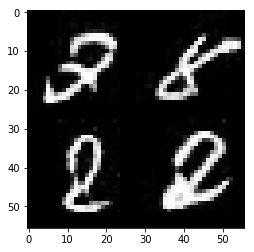

Epoch 30/30... Discriminator Loss: 0.8135... Generator Loss: 1.1405
finish


In [170]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5
tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 30

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
print('finish')

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

3
Epoch 1/10... Discriminator Loss: 0.2195... Generator Loss: 2.6250
Epoch 1/10... Discriminator Loss: 1.4144... Generator Loss: 6.9776
Epoch 1/10... Discriminator Loss: 0.3258... Generator Loss: 3.3723
Epoch 1/10... Discriminator Loss: 0.0784... Generator Loss: 4.1653


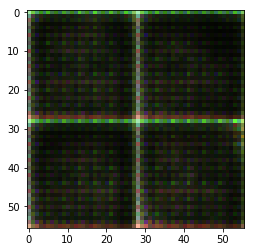

Epoch 1/10... Discriminator Loss: 0.0543... Generator Loss: 4.1071
Epoch 1/10... Discriminator Loss: 0.0315... Generator Loss: 4.4785
Epoch 1/10... Discriminator Loss: 0.0270... Generator Loss: 4.4324
Epoch 1/10... Discriminator Loss: 0.0173... Generator Loss: 4.5150


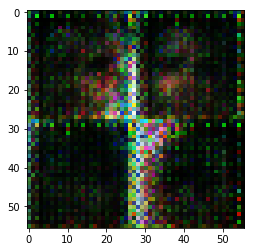

Epoch 1/10... Discriminator Loss: 0.0116... Generator Loss: 5.0796
Epoch 1/10... Discriminator Loss: 0.0135... Generator Loss: 4.9162
Epoch 1/10... Discriminator Loss: 0.0594... Generator Loss: 3.1516
Epoch 1/10... Discriminator Loss: 0.9413... Generator Loss: 2.6443


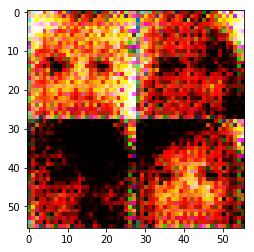

Epoch 1/10... Discriminator Loss: 0.3662... Generator Loss: 2.8448
Epoch 1/10... Discriminator Loss: 0.2662... Generator Loss: 2.6317
Epoch 1/10... Discriminator Loss: 0.9625... Generator Loss: 0.7981
Epoch 1/10... Discriminator Loss: 0.9549... Generator Loss: 0.7480


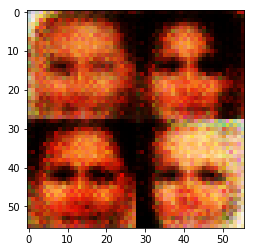

Epoch 1/10... Discriminator Loss: 1.2928... Generator Loss: 2.1374
Epoch 1/10... Discriminator Loss: 1.0797... Generator Loss: 0.6300
Epoch 1/10... Discriminator Loss: 0.9613... Generator Loss: 2.5893
Epoch 1/10... Discriminator Loss: 1.0553... Generator Loss: 0.7042


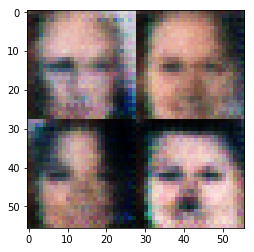

Epoch 1/10... Discriminator Loss: 0.9137... Generator Loss: 1.8802
Epoch 1/10... Discriminator Loss: 0.5797... Generator Loss: 1.3599
Epoch 1/10... Discriminator Loss: 1.4833... Generator Loss: 3.6156
Epoch 1/10... Discriminator Loss: 0.5889... Generator Loss: 3.2550


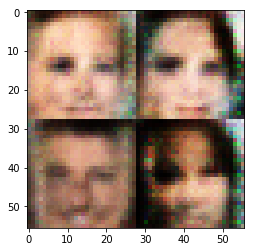

Epoch 1/10... Discriminator Loss: 1.0850... Generator Loss: 1.1249
Epoch 1/10... Discriminator Loss: 1.1510... Generator Loss: 0.7563
Epoch 1/10... Discriminator Loss: 0.4877... Generator Loss: 1.5656
Epoch 1/10... Discriminator Loss: 0.8460... Generator Loss: 0.8713


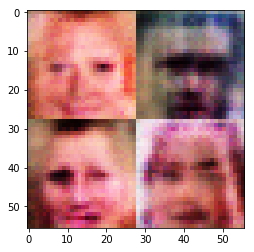

Epoch 1/10... Discriminator Loss: 0.7840... Generator Loss: 1.0626
Epoch 1/10... Discriminator Loss: 0.9212... Generator Loss: 0.7558
Epoch 1/10... Discriminator Loss: 0.7967... Generator Loss: 0.9018
Epoch 1/10... Discriminator Loss: 0.5690... Generator Loss: 2.4464


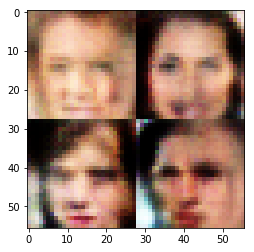

Epoch 1/10... Discriminator Loss: 0.7399... Generator Loss: 0.8780
Epoch 1/10... Discriminator Loss: 0.3179... Generator Loss: 3.1214
Epoch 1/10... Discriminator Loss: 0.3727... Generator Loss: 2.2191
Epoch 1/10... Discriminator Loss: 0.6241... Generator Loss: 1.7077


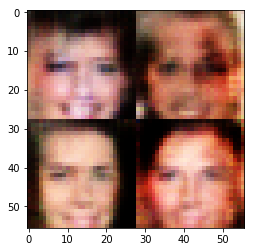

Epoch 1/10... Discriminator Loss: 0.3713... Generator Loss: 1.8088
Epoch 1/10... Discriminator Loss: 0.8751... Generator Loss: 0.7428
Epoch 1/10... Discriminator Loss: 0.6324... Generator Loss: 1.6117
Epoch 1/10... Discriminator Loss: 1.6608... Generator Loss: 0.2750


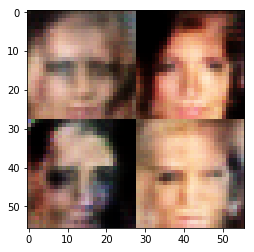

Epoch 1/10... Discriminator Loss: 0.2802... Generator Loss: 2.6994
Epoch 1/10... Discriminator Loss: 0.9755... Generator Loss: 0.6148
Epoch 1/10... Discriminator Loss: 0.8256... Generator Loss: 4.2010
Epoch 1/10... Discriminator Loss: 0.5446... Generator Loss: 2.1855


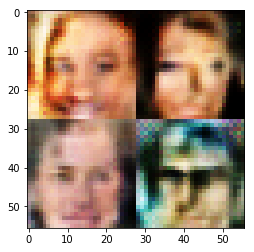

Epoch 1/10... Discriminator Loss: 0.2042... Generator Loss: 3.3518
Epoch 1/10... Discriminator Loss: 0.9676... Generator Loss: 0.6329
Epoch 1/10... Discriminator Loss: 0.4134... Generator Loss: 2.1541
Epoch 1/10... Discriminator Loss: 0.5538... Generator Loss: 1.4103


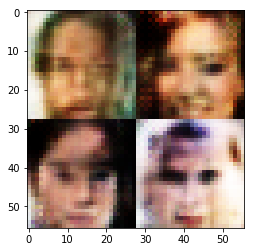

Epoch 1/10... Discriminator Loss: 0.2753... Generator Loss: 2.8557
Epoch 1/10... Discriminator Loss: 0.7036... Generator Loss: 4.1263
Epoch 1/10... Discriminator Loss: 0.5147... Generator Loss: 1.2023
Epoch 1/10... Discriminator Loss: 0.2698... Generator Loss: 2.5245


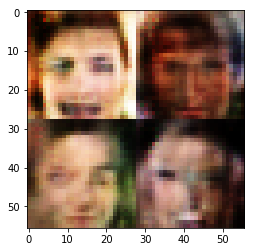

Epoch 1/10... Discriminator Loss: 0.1873... Generator Loss: 3.3035
Epoch 1/10... Discriminator Loss: 1.9290... Generator Loss: 0.2677
Epoch 1/10... Discriminator Loss: 0.1774... Generator Loss: 3.9893
Epoch 1/10... Discriminator Loss: 0.1961... Generator Loss: 2.8534


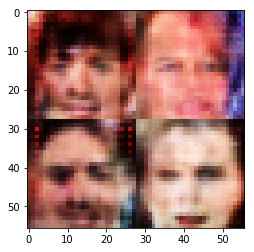

Epoch 1/10... Discriminator Loss: 0.8229... Generator Loss: 0.9347
Epoch 1/10... Discriminator Loss: 0.6612... Generator Loss: 3.6614
Epoch 1/10... Discriminator Loss: 0.2426... Generator Loss: 2.5797
Epoch 1/10... Discriminator Loss: 0.6120... Generator Loss: 1.1187


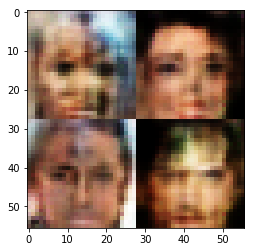

Epoch 1/10... Discriminator Loss: 0.3307... Generator Loss: 2.3442
Epoch 1/10... Discriminator Loss: 0.4012... Generator Loss: 1.9923
Epoch 1/10... Discriminator Loss: 0.4000... Generator Loss: 1.6681
Epoch 2/10... Discriminator Loss: 0.8482... Generator Loss: 0.9242


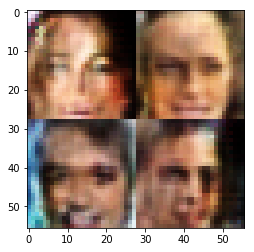

Epoch 2/10... Discriminator Loss: 1.0664... Generator Loss: 0.6005
Epoch 2/10... Discriminator Loss: 0.3223... Generator Loss: 2.1120
Epoch 2/10... Discriminator Loss: 0.5510... Generator Loss: 1.1084
Epoch 2/10... Discriminator Loss: 0.5937... Generator Loss: 2.8969


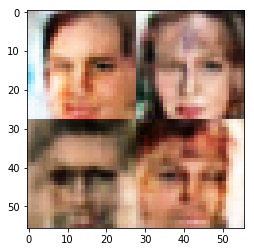

Epoch 2/10... Discriminator Loss: 1.1465... Generator Loss: 0.4787
Epoch 2/10... Discriminator Loss: 0.7218... Generator Loss: 1.2974
Epoch 2/10... Discriminator Loss: 0.2300... Generator Loss: 2.6984
Epoch 2/10... Discriminator Loss: 0.1961... Generator Loss: 3.0313


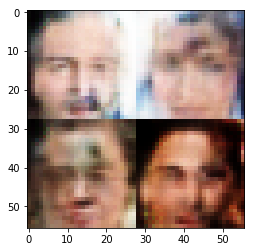

Epoch 2/10... Discriminator Loss: 0.2887... Generator Loss: 1.8935
Epoch 2/10... Discriminator Loss: 0.2640... Generator Loss: 2.2193
Epoch 2/10... Discriminator Loss: 0.3141... Generator Loss: 2.2824
Epoch 2/10... Discriminator Loss: 0.1201... Generator Loss: 4.6744


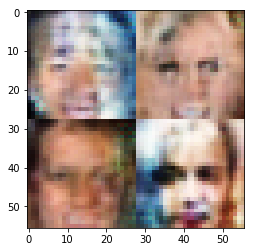

Epoch 2/10... Discriminator Loss: 1.0700... Generator Loss: 3.4317
Epoch 2/10... Discriminator Loss: 0.7154... Generator Loss: 1.0986
Epoch 2/10... Discriminator Loss: 0.6741... Generator Loss: 0.9801
Epoch 2/10... Discriminator Loss: 0.4388... Generator Loss: 2.0272


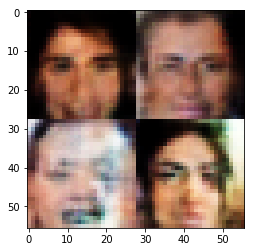

Epoch 2/10... Discriminator Loss: 0.3577... Generator Loss: 2.1884
Epoch 2/10... Discriminator Loss: 1.7898... Generator Loss: 0.6939
Epoch 2/10... Discriminator Loss: 0.4387... Generator Loss: 2.4532
Epoch 2/10... Discriminator Loss: 0.5220... Generator Loss: 1.1663


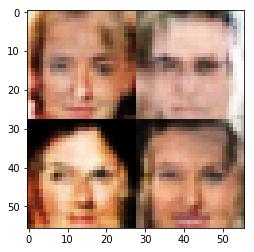

Epoch 2/10... Discriminator Loss: 0.6675... Generator Loss: 1.1038
Epoch 2/10... Discriminator Loss: 0.3114... Generator Loss: 2.4738
Epoch 2/10... Discriminator Loss: 1.1476... Generator Loss: 0.5282
Epoch 2/10... Discriminator Loss: 0.5130... Generator Loss: 3.2462


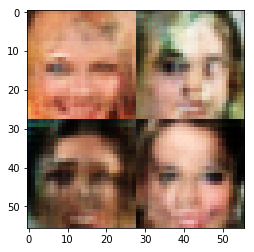

Epoch 2/10... Discriminator Loss: 0.8765... Generator Loss: 0.8328
Epoch 2/10... Discriminator Loss: 0.2606... Generator Loss: 2.6045
Epoch 2/10... Discriminator Loss: 0.2617... Generator Loss: 4.1260
Epoch 2/10... Discriminator Loss: 0.2595... Generator Loss: 2.3919


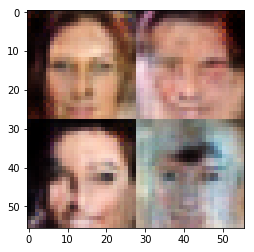

Epoch 2/10... Discriminator Loss: 0.3503... Generator Loss: 2.3596
Epoch 2/10... Discriminator Loss: 0.9906... Generator Loss: 0.9580
Epoch 2/10... Discriminator Loss: 0.4879... Generator Loss: 1.6077
Epoch 2/10... Discriminator Loss: 0.5367... Generator Loss: 1.9725


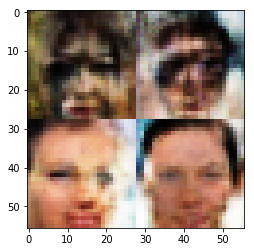

Epoch 2/10... Discriminator Loss: 0.8367... Generator Loss: 3.1318
Epoch 2/10... Discriminator Loss: 0.7880... Generator Loss: 0.8642
Epoch 2/10... Discriminator Loss: 0.6186... Generator Loss: 1.0003
Epoch 2/10... Discriminator Loss: 0.5959... Generator Loss: 1.0765


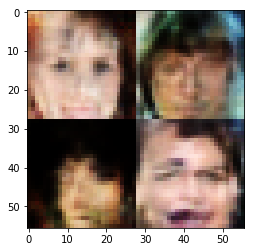

Epoch 2/10... Discriminator Loss: 0.3661... Generator Loss: 1.5160
Epoch 2/10... Discriminator Loss: 0.1410... Generator Loss: 3.2394
Epoch 2/10... Discriminator Loss: 0.4460... Generator Loss: 2.2303
Epoch 2/10... Discriminator Loss: 0.6911... Generator Loss: 0.9756


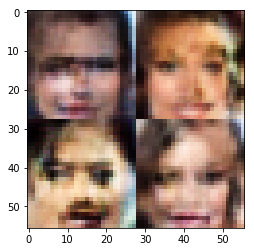

Epoch 2/10... Discriminator Loss: 0.3474... Generator Loss: 2.2343
Epoch 2/10... Discriminator Loss: 1.9918... Generator Loss: 0.2309
Epoch 2/10... Discriminator Loss: 0.5165... Generator Loss: 2.6095
Epoch 2/10... Discriminator Loss: 0.5269... Generator Loss: 2.0603


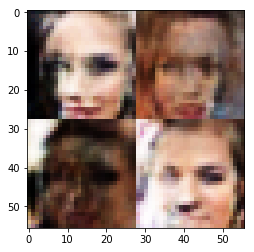

Epoch 2/10... Discriminator Loss: 0.4652... Generator Loss: 2.5954
Epoch 2/10... Discriminator Loss: 0.2348... Generator Loss: 3.3542
Epoch 2/10... Discriminator Loss: 0.3384... Generator Loss: 1.6841
Epoch 2/10... Discriminator Loss: 2.8059... Generator Loss: 4.0030


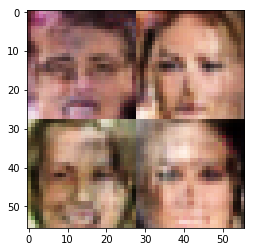

Epoch 2/10... Discriminator Loss: 0.3859... Generator Loss: 2.0794
Epoch 2/10... Discriminator Loss: 0.7803... Generator Loss: 0.9022
Epoch 2/10... Discriminator Loss: 0.6284... Generator Loss: 1.0682
Epoch 2/10... Discriminator Loss: 0.4029... Generator Loss: 2.9305


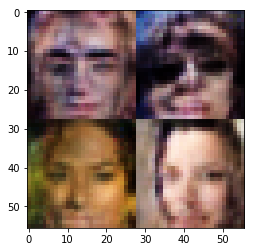

Epoch 2/10... Discriminator Loss: 0.4852... Generator Loss: 2.5689
Epoch 2/10... Discriminator Loss: 0.6573... Generator Loss: 3.4833
Epoch 2/10... Discriminator Loss: 0.4769... Generator Loss: 1.8030
Epoch 2/10... Discriminator Loss: 0.4171... Generator Loss: 1.9459


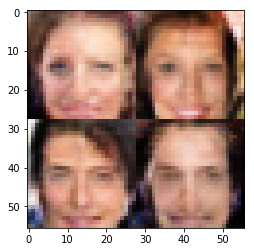

Epoch 2/10... Discriminator Loss: 0.1242... Generator Loss: 4.9626
Epoch 2/10... Discriminator Loss: 0.3937... Generator Loss: 1.6407
Epoch 2/10... Discriminator Loss: 0.7190... Generator Loss: 2.7580
Epoch 2/10... Discriminator Loss: 0.5434... Generator Loss: 1.3170


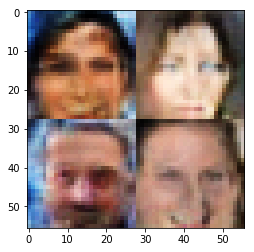

Epoch 2/10... Discriminator Loss: 0.5240... Generator Loss: 1.1989
Epoch 2/10... Discriminator Loss: 0.8455... Generator Loss: 0.7499
Epoch 3/10... Discriminator Loss: 0.6476... Generator Loss: 1.1250
Epoch 3/10... Discriminator Loss: 0.5324... Generator Loss: 1.3623


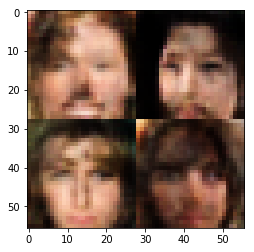

Epoch 3/10... Discriminator Loss: 0.3567... Generator Loss: 3.0219
Epoch 3/10... Discriminator Loss: 0.4507... Generator Loss: 1.4134
Epoch 3/10... Discriminator Loss: 0.9115... Generator Loss: 0.6876
Epoch 3/10... Discriminator Loss: 0.7794... Generator Loss: 0.8689


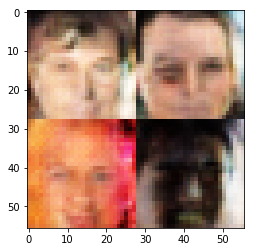

Epoch 3/10... Discriminator Loss: 1.5017... Generator Loss: 0.8156
Epoch 3/10... Discriminator Loss: 0.4484... Generator Loss: 1.5550
Epoch 3/10... Discriminator Loss: 0.7952... Generator Loss: 0.8044
Epoch 3/10... Discriminator Loss: 0.3149... Generator Loss: 2.0722


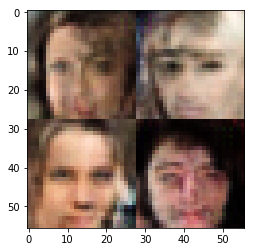

Epoch 3/10... Discriminator Loss: 0.4750... Generator Loss: 2.8805
Epoch 3/10... Discriminator Loss: 0.3092... Generator Loss: 2.0055
Epoch 3/10... Discriminator Loss: 0.2360... Generator Loss: 2.3547
Epoch 3/10... Discriminator Loss: 0.5684... Generator Loss: 1.1280


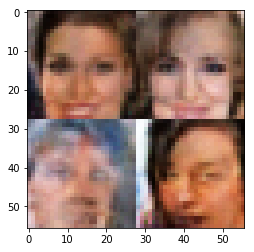

Epoch 3/10... Discriminator Loss: 0.5736... Generator Loss: 1.8139
Epoch 3/10... Discriminator Loss: 0.6672... Generator Loss: 1.6188
Epoch 3/10... Discriminator Loss: 0.7971... Generator Loss: 0.7785
Epoch 3/10... Discriminator Loss: 0.2834... Generator Loss: 2.4566


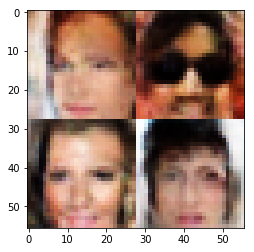

Epoch 3/10... Discriminator Loss: 0.3063... Generator Loss: 4.2939
Epoch 3/10... Discriminator Loss: 0.5608... Generator Loss: 1.1162
Epoch 3/10... Discriminator Loss: 0.4759... Generator Loss: 1.4478
Epoch 3/10... Discriminator Loss: 0.5987... Generator Loss: 1.1124


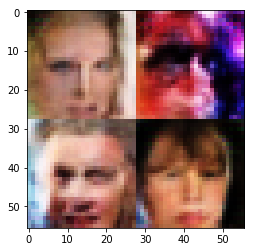

Epoch 3/10... Discriminator Loss: 0.1966... Generator Loss: 2.2395
Epoch 3/10... Discriminator Loss: 1.1128... Generator Loss: 1.1708
Epoch 3/10... Discriminator Loss: 1.0991... Generator Loss: 1.7033
Epoch 3/10... Discriminator Loss: 0.8363... Generator Loss: 0.9651


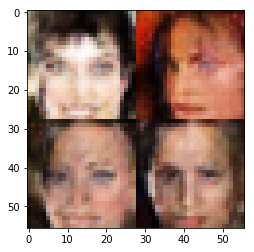

Epoch 3/10... Discriminator Loss: 0.7112... Generator Loss: 1.0669
Epoch 3/10... Discriminator Loss: 0.9251... Generator Loss: 2.4046
Epoch 3/10... Discriminator Loss: 1.0080... Generator Loss: 1.5347
Epoch 3/10... Discriminator Loss: 1.8832... Generator Loss: 0.2735


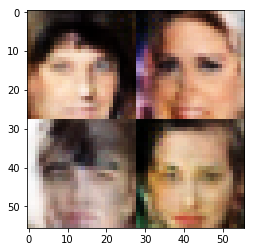

Epoch 3/10... Discriminator Loss: 0.4461... Generator Loss: 2.5495
Epoch 3/10... Discriminator Loss: 0.3882... Generator Loss: 1.8772
Epoch 3/10... Discriminator Loss: 0.1880... Generator Loss: 2.4834
Epoch 3/10... Discriminator Loss: 0.5512... Generator Loss: 1.1432


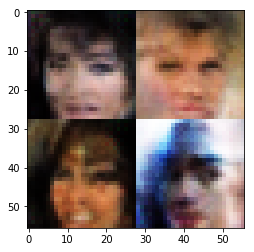

Epoch 3/10... Discriminator Loss: 1.2191... Generator Loss: 3.5316
Epoch 3/10... Discriminator Loss: 0.4525... Generator Loss: 1.3958
Epoch 3/10... Discriminator Loss: 1.0885... Generator Loss: 2.2041
Epoch 3/10... Discriminator Loss: 0.6671... Generator Loss: 1.0446


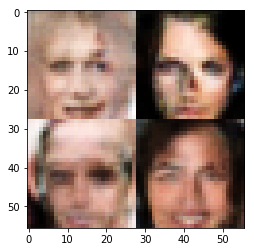

Epoch 3/10... Discriminator Loss: 0.3306... Generator Loss: 2.1478
Epoch 3/10... Discriminator Loss: 0.3431... Generator Loss: 1.8063
Epoch 3/10... Discriminator Loss: 0.1600... Generator Loss: 3.1181
Epoch 3/10... Discriminator Loss: 0.2942... Generator Loss: 1.9410


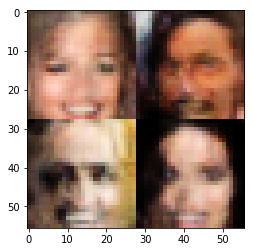

Epoch 3/10... Discriminator Loss: 0.9758... Generator Loss: 0.8004
Epoch 3/10... Discriminator Loss: 0.1541... Generator Loss: 2.9847
Epoch 3/10... Discriminator Loss: 0.2104... Generator Loss: 2.8045
Epoch 3/10... Discriminator Loss: 0.5309... Generator Loss: 1.6233


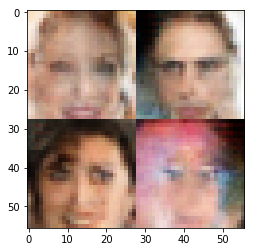

Epoch 3/10... Discriminator Loss: 0.3245... Generator Loss: 2.9948
Epoch 3/10... Discriminator Loss: 0.5665... Generator Loss: 1.4063
Epoch 3/10... Discriminator Loss: 0.2503... Generator Loss: 2.0796
Epoch 3/10... Discriminator Loss: 0.4004... Generator Loss: 1.7625


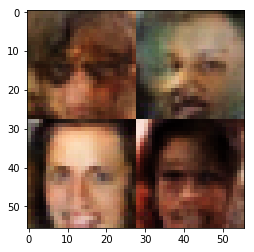

Epoch 3/10... Discriminator Loss: 0.2604... Generator Loss: 2.2544
Epoch 3/10... Discriminator Loss: 0.5218... Generator Loss: 1.2445
Epoch 3/10... Discriminator Loss: 0.5757... Generator Loss: 1.7229
Epoch 3/10... Discriminator Loss: 0.7942... Generator Loss: 0.8922


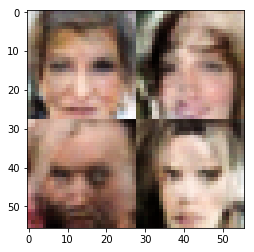

Epoch 3/10... Discriminator Loss: 0.4629... Generator Loss: 1.4404
Epoch 3/10... Discriminator Loss: 0.7533... Generator Loss: 1.6879
Epoch 3/10... Discriminator Loss: 2.0633... Generator Loss: 0.1961
Epoch 3/10... Discriminator Loss: 1.4682... Generator Loss: 0.4391


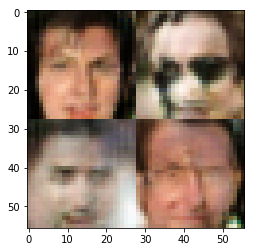

Epoch 3/10... Discriminator Loss: 0.4140... Generator Loss: 3.1396
Epoch 3/10... Discriminator Loss: 0.1133... Generator Loss: 3.2081
Epoch 3/10... Discriminator Loss: 0.4029... Generator Loss: 2.9179
Epoch 3/10... Discriminator Loss: 0.4638... Generator Loss: 1.3781


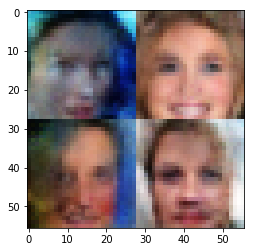

Epoch 3/10... Discriminator Loss: 0.6775... Generator Loss: 1.7407
Epoch 4/10... Discriminator Loss: 0.9997... Generator Loss: 3.3315
Epoch 4/10... Discriminator Loss: 0.2605... Generator Loss: 2.2898
Epoch 4/10... Discriminator Loss: 0.2383... Generator Loss: 3.0057


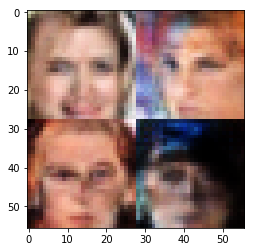

Epoch 4/10... Discriminator Loss: 0.2710... Generator Loss: 2.4235
Epoch 4/10... Discriminator Loss: 0.2346... Generator Loss: 2.1649
Epoch 4/10... Discriminator Loss: 2.7443... Generator Loss: 6.0385
Epoch 4/10... Discriminator Loss: 0.6087... Generator Loss: 1.5007


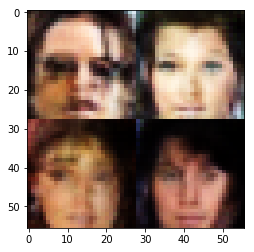

Epoch 4/10... Discriminator Loss: 0.5976... Generator Loss: 1.2379
Epoch 4/10... Discriminator Loss: 0.3294... Generator Loss: 1.7944
Epoch 4/10... Discriminator Loss: 0.5548... Generator Loss: 1.6621
Epoch 4/10... Discriminator Loss: 0.4384... Generator Loss: 1.5901


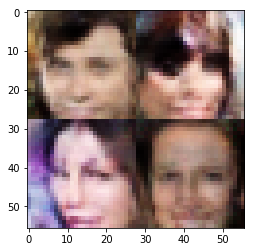

Epoch 4/10... Discriminator Loss: 1.1968... Generator Loss: 0.5561
Epoch 4/10... Discriminator Loss: 0.9607... Generator Loss: 0.6730
Epoch 4/10... Discriminator Loss: 0.4948... Generator Loss: 1.3704
Epoch 4/10... Discriminator Loss: 0.2978... Generator Loss: 1.8904


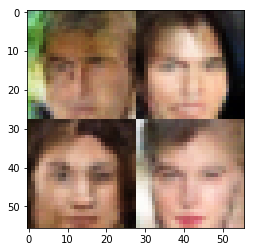

Epoch 4/10... Discriminator Loss: 0.5305... Generator Loss: 3.4355
Epoch 4/10... Discriminator Loss: 0.2684... Generator Loss: 2.6686
Epoch 4/10... Discriminator Loss: 0.6304... Generator Loss: 2.1182
Epoch 4/10... Discriminator Loss: 0.2487... Generator Loss: 2.0785


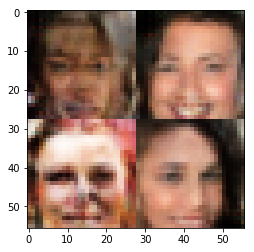

Epoch 4/10... Discriminator Loss: 1.1345... Generator Loss: 1.8812
Epoch 4/10... Discriminator Loss: 0.4378... Generator Loss: 1.4834
Epoch 4/10... Discriminator Loss: 0.9166... Generator Loss: 0.9809
Epoch 4/10... Discriminator Loss: 0.4520... Generator Loss: 1.8816


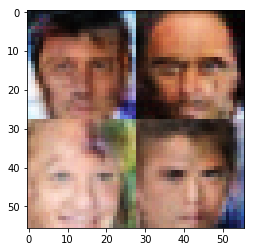

Epoch 4/10... Discriminator Loss: 0.8102... Generator Loss: 1.0610
Epoch 4/10... Discriminator Loss: 0.4190... Generator Loss: 1.8264
Epoch 4/10... Discriminator Loss: 0.3521... Generator Loss: 2.8166
Epoch 4/10... Discriminator Loss: 0.9560... Generator Loss: 2.1328


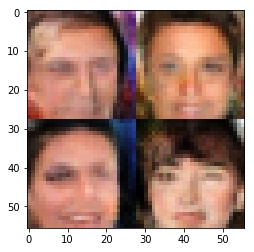

Epoch 4/10... Discriminator Loss: 0.7641... Generator Loss: 0.9434
Epoch 4/10... Discriminator Loss: 0.5144... Generator Loss: 1.6947
Epoch 4/10... Discriminator Loss: 0.7579... Generator Loss: 0.8493
Epoch 4/10... Discriminator Loss: 0.7565... Generator Loss: 1.0225


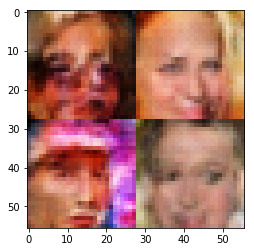

Epoch 4/10... Discriminator Loss: 0.8163... Generator Loss: 0.7816
Epoch 4/10... Discriminator Loss: 0.9960... Generator Loss: 0.6161
Epoch 4/10... Discriminator Loss: 0.4589... Generator Loss: 1.6517
Epoch 4/10... Discriminator Loss: 1.8215... Generator Loss: 0.2588


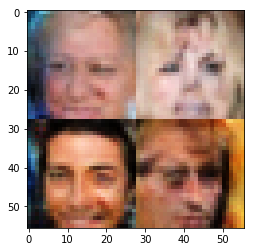

Epoch 4/10... Discriminator Loss: 0.6923... Generator Loss: 1.3721
Epoch 4/10... Discriminator Loss: 0.1558... Generator Loss: 3.1433
Epoch 4/10... Discriminator Loss: 0.9678... Generator Loss: 1.1199
Epoch 4/10... Discriminator Loss: 0.3112... Generator Loss: 2.5340


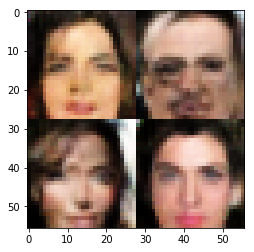

Epoch 4/10... Discriminator Loss: 0.3463... Generator Loss: 2.6737
Epoch 4/10... Discriminator Loss: 0.6052... Generator Loss: 1.7494
Epoch 4/10... Discriminator Loss: 1.9510... Generator Loss: 0.2213
Epoch 4/10... Discriminator Loss: 1.4193... Generator Loss: 0.4109


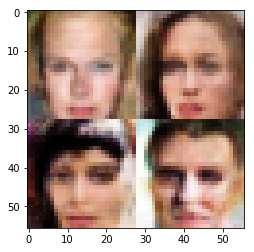

Epoch 4/10... Discriminator Loss: 0.2608... Generator Loss: 2.0963
Epoch 4/10... Discriminator Loss: 0.8316... Generator Loss: 0.8390
Epoch 4/10... Discriminator Loss: 0.1126... Generator Loss: 6.1068
Epoch 4/10... Discriminator Loss: 0.1692... Generator Loss: 3.1919


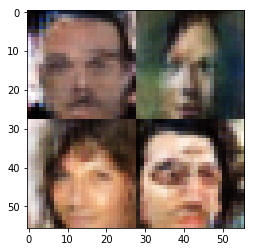

Epoch 4/10... Discriminator Loss: 0.3646... Generator Loss: 3.1887
Epoch 4/10... Discriminator Loss: 1.0287... Generator Loss: 0.7585
Epoch 4/10... Discriminator Loss: 0.4451... Generator Loss: 1.6715
Epoch 4/10... Discriminator Loss: 0.5142... Generator Loss: 3.5170


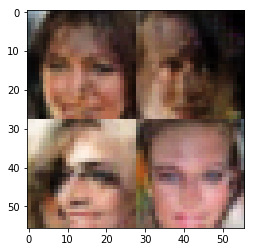

Epoch 4/10... Discriminator Loss: 0.9634... Generator Loss: 0.7530
Epoch 4/10... Discriminator Loss: 0.3442... Generator Loss: 3.9114
Epoch 4/10... Discriminator Loss: 0.7579... Generator Loss: 0.8931
Epoch 4/10... Discriminator Loss: 0.5293... Generator Loss: 1.4738


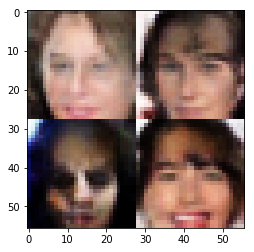

Epoch 4/10... Discriminator Loss: 0.2616... Generator Loss: 2.3313
Epoch 4/10... Discriminator Loss: 0.7197... Generator Loss: 3.1619
Epoch 4/10... Discriminator Loss: 0.4898... Generator Loss: 1.5120
Epoch 4/10... Discriminator Loss: 0.3309... Generator Loss: 2.1558


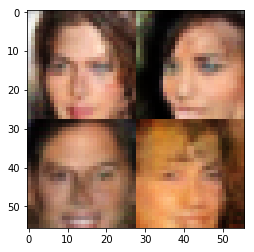

Epoch 4/10... Discriminator Loss: 2.1716... Generator Loss: 0.1832
Epoch 4/10... Discriminator Loss: 0.5624... Generator Loss: 1.9199
Epoch 4/10... Discriminator Loss: 0.4992... Generator Loss: 1.2130
Epoch 4/10... Discriminator Loss: 0.9921... Generator Loss: 0.6356


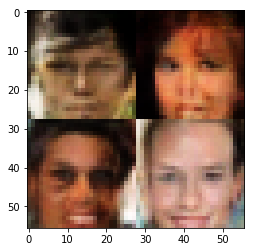

Epoch 4/10... Discriminator Loss: 0.9389... Generator Loss: 0.7923
Epoch 5/10... Discriminator Loss: 0.5040... Generator Loss: 2.1454
Epoch 5/10... Discriminator Loss: 0.8427... Generator Loss: 0.8382
Epoch 5/10... Discriminator Loss: 0.5451... Generator Loss: 1.6138


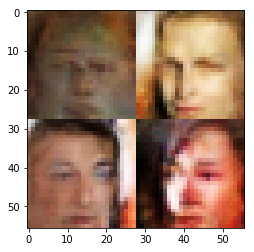

Epoch 5/10... Discriminator Loss: 0.2494... Generator Loss: 2.3177
Epoch 5/10... Discriminator Loss: 0.8082... Generator Loss: 0.8414
Epoch 5/10... Discriminator Loss: 0.8721... Generator Loss: 1.1241
Epoch 5/10... Discriminator Loss: 2.3793... Generator Loss: 0.1753


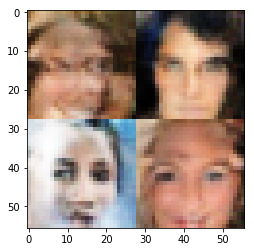

Epoch 5/10... Discriminator Loss: 0.2777... Generator Loss: 2.2653
Epoch 5/10... Discriminator Loss: 0.2659... Generator Loss: 2.0176
Epoch 5/10... Discriminator Loss: 0.2777... Generator Loss: 2.4975
Epoch 5/10... Discriminator Loss: 0.6304... Generator Loss: 1.3467


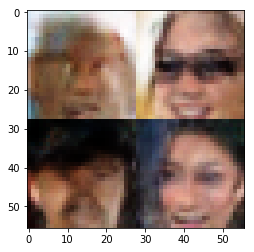

Epoch 5/10... Discriminator Loss: 0.7827... Generator Loss: 0.7925
Epoch 5/10... Discriminator Loss: 0.7276... Generator Loss: 0.8785
Epoch 5/10... Discriminator Loss: 1.0412... Generator Loss: 0.6158
Epoch 5/10... Discriminator Loss: 0.8754... Generator Loss: 0.7761


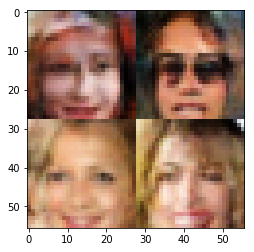

Epoch 5/10... Discriminator Loss: 0.6801... Generator Loss: 1.7660
Epoch 5/10... Discriminator Loss: 0.3715... Generator Loss: 2.5074
Epoch 5/10... Discriminator Loss: 0.7022... Generator Loss: 1.0055
Epoch 5/10... Discriminator Loss: 1.3749... Generator Loss: 3.3470


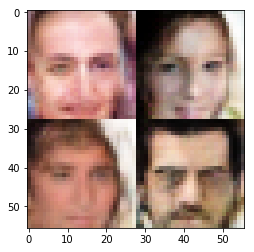

Epoch 5/10... Discriminator Loss: 0.3674... Generator Loss: 3.4769
Epoch 5/10... Discriminator Loss: 0.6440... Generator Loss: 1.4055
Epoch 5/10... Discriminator Loss: 0.6573... Generator Loss: 1.4034
Epoch 5/10... Discriminator Loss: 0.7989... Generator Loss: 2.1658


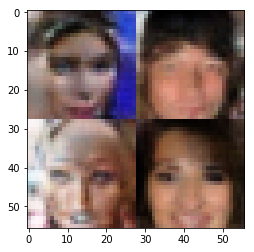

Epoch 5/10... Discriminator Loss: 0.0846... Generator Loss: 3.5292
Epoch 5/10... Discriminator Loss: 0.4109... Generator Loss: 2.1521
Epoch 5/10... Discriminator Loss: 0.1370... Generator Loss: 2.8553
Epoch 5/10... Discriminator Loss: 0.3001... Generator Loss: 3.8964


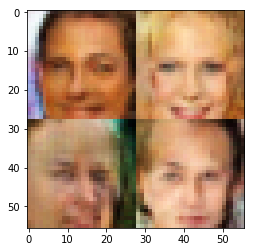

Epoch 5/10... Discriminator Loss: 0.6621... Generator Loss: 1.1853
Epoch 5/10... Discriminator Loss: 0.7725... Generator Loss: 1.0899
Epoch 5/10... Discriminator Loss: 0.6318... Generator Loss: 1.0999
Epoch 5/10... Discriminator Loss: 0.3552... Generator Loss: 1.6379


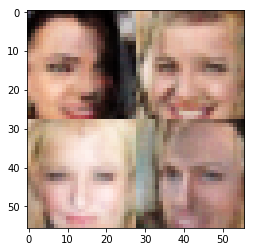

Epoch 5/10... Discriminator Loss: 0.2569... Generator Loss: 2.5543
Epoch 5/10... Discriminator Loss: 0.4536... Generator Loss: 1.3459
Epoch 5/10... Discriminator Loss: 0.5845... Generator Loss: 1.7142
Epoch 5/10... Discriminator Loss: 0.4644... Generator Loss: 2.1091


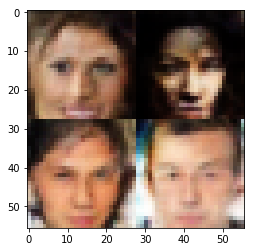

Epoch 5/10... Discriminator Loss: 0.2441... Generator Loss: 2.6577
Epoch 5/10... Discriminator Loss: 0.7523... Generator Loss: 1.2997
Epoch 5/10... Discriminator Loss: 0.4134... Generator Loss: 1.6530
Epoch 5/10... Discriminator Loss: 0.3882... Generator Loss: 1.9965


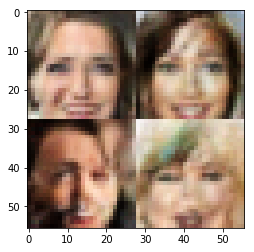

Epoch 5/10... Discriminator Loss: 0.6024... Generator Loss: 1.3196
Epoch 5/10... Discriminator Loss: 1.0888... Generator Loss: 0.5468
Epoch 5/10... Discriminator Loss: 0.4726... Generator Loss: 1.7234
Epoch 5/10... Discriminator Loss: 0.5800... Generator Loss: 1.9015


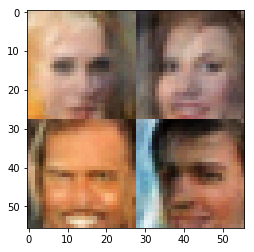

Epoch 5/10... Discriminator Loss: 0.4548... Generator Loss: 1.4325
Epoch 5/10... Discriminator Loss: 0.6404... Generator Loss: 1.3487
Epoch 5/10... Discriminator Loss: 0.7685... Generator Loss: 0.9269
Epoch 5/10... Discriminator Loss: 0.5119... Generator Loss: 1.2239


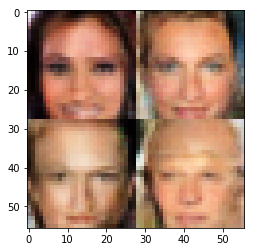

Epoch 5/10... Discriminator Loss: 1.3675... Generator Loss: 0.4393
Epoch 5/10... Discriminator Loss: 1.6673... Generator Loss: 0.2766
Epoch 5/10... Discriminator Loss: 0.2534... Generator Loss: 2.3918
Epoch 5/10... Discriminator Loss: 0.3772... Generator Loss: 1.8044


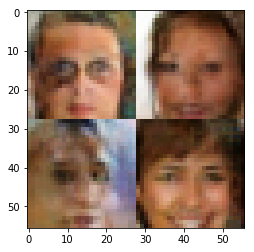

Epoch 5/10... Discriminator Loss: 0.8638... Generator Loss: 2.2562
Epoch 5/10... Discriminator Loss: 0.2330... Generator Loss: 3.2413
Epoch 5/10... Discriminator Loss: 0.5077... Generator Loss: 1.5564
Epoch 5/10... Discriminator Loss: 0.5258... Generator Loss: 1.8775


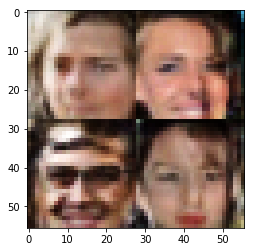

Epoch 5/10... Discriminator Loss: 2.7498... Generator Loss: 0.1112
Epoch 5/10... Discriminator Loss: 0.7434... Generator Loss: 1.7961
Epoch 5/10... Discriminator Loss: 0.9110... Generator Loss: 0.7206
Epoch 5/10... Discriminator Loss: 1.1640... Generator Loss: 0.5476


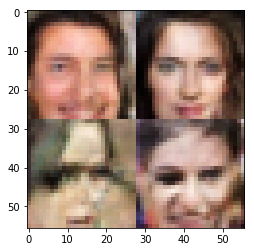

Epoch 5/10... Discriminator Loss: 0.6533... Generator Loss: 1.1124
Epoch 5/10... Discriminator Loss: 0.4838... Generator Loss: 1.4640
Epoch 5/10... Discriminator Loss: 0.8971... Generator Loss: 1.9047
Epoch 5/10... Discriminator Loss: 0.3509... Generator Loss: 1.7947


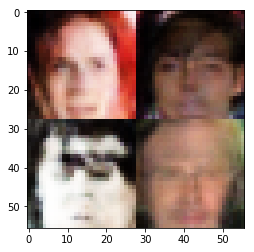

Epoch 6/10... Discriminator Loss: 0.7150... Generator Loss: 1.4367
Epoch 6/10... Discriminator Loss: 1.1240... Generator Loss: 0.8493
Epoch 6/10... Discriminator Loss: 0.6356... Generator Loss: 1.3209
Epoch 6/10... Discriminator Loss: 0.2167... Generator Loss: 2.5774


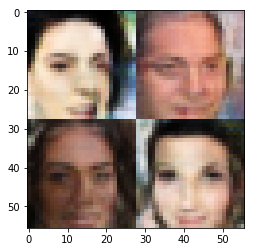

Epoch 6/10... Discriminator Loss: 0.3156... Generator Loss: 2.0354
Epoch 6/10... Discriminator Loss: 5.5420... Generator Loss: 6.8656
Epoch 6/10... Discriminator Loss: 0.9295... Generator Loss: 1.1974
Epoch 6/10... Discriminator Loss: 0.4903... Generator Loss: 1.4917


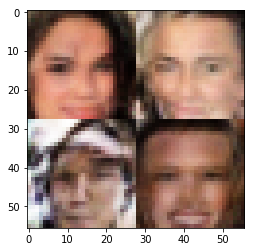

Epoch 6/10... Discriminator Loss: 0.3904... Generator Loss: 1.5623
Epoch 6/10... Discriminator Loss: 0.3808... Generator Loss: 1.7754
Epoch 6/10... Discriminator Loss: 0.5761... Generator Loss: 1.8014
Epoch 6/10... Discriminator Loss: 0.7949... Generator Loss: 0.8310


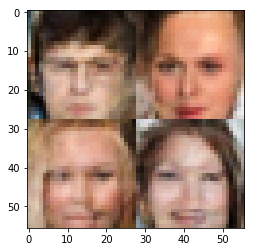

Epoch 6/10... Discriminator Loss: 0.3779... Generator Loss: 4.6149
Epoch 6/10... Discriminator Loss: 0.0920... Generator Loss: 5.9283
Epoch 6/10... Discriminator Loss: 1.5291... Generator Loss: 0.3753
Epoch 6/10... Discriminator Loss: 0.5812... Generator Loss: 1.5174


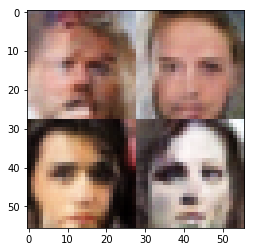

Epoch 6/10... Discriminator Loss: 0.2449... Generator Loss: 1.9872
Epoch 6/10... Discriminator Loss: 1.0910... Generator Loss: 0.6914
Epoch 6/10... Discriminator Loss: 0.4657... Generator Loss: 2.1054
Epoch 6/10... Discriminator Loss: 0.5594... Generator Loss: 1.2327


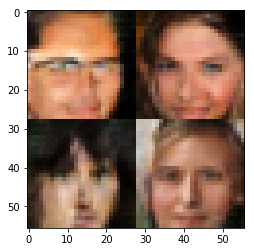

Epoch 6/10... Discriminator Loss: 0.5859... Generator Loss: 1.2590
Epoch 6/10... Discriminator Loss: 0.9245... Generator Loss: 2.0303
Epoch 6/10... Discriminator Loss: 0.5576... Generator Loss: 1.4451
Epoch 6/10... Discriminator Loss: 1.1927... Generator Loss: 0.5325


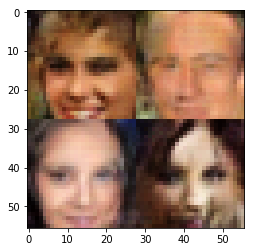

Epoch 6/10... Discriminator Loss: 0.6616... Generator Loss: 1.0012
Epoch 6/10... Discriminator Loss: 0.5664... Generator Loss: 1.3460
Epoch 6/10... Discriminator Loss: 1.3506... Generator Loss: 0.4323
Epoch 6/10... Discriminator Loss: 0.6399... Generator Loss: 1.0409


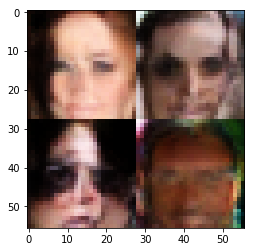

Epoch 6/10... Discriminator Loss: 0.6590... Generator Loss: 1.1102
Epoch 6/10... Discriminator Loss: 1.0727... Generator Loss: 2.9130
Epoch 6/10... Discriminator Loss: 1.1375... Generator Loss: 1.9381
Epoch 6/10... Discriminator Loss: 0.3678... Generator Loss: 1.9697


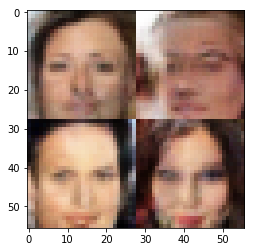

Epoch 6/10... Discriminator Loss: 0.8309... Generator Loss: 0.7630
Epoch 6/10... Discriminator Loss: 0.6549... Generator Loss: 1.0547
Epoch 6/10... Discriminator Loss: 0.4907... Generator Loss: 1.5217
Epoch 6/10... Discriminator Loss: 0.7965... Generator Loss: 0.8009


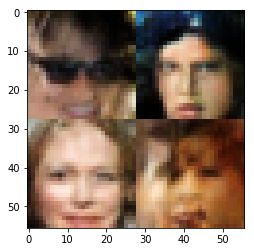

Epoch 6/10... Discriminator Loss: 1.3810... Generator Loss: 0.4323
Epoch 6/10... Discriminator Loss: 1.0139... Generator Loss: 0.6570
Epoch 6/10... Discriminator Loss: 0.3703... Generator Loss: 2.4289
Epoch 6/10... Discriminator Loss: 0.2110... Generator Loss: 2.6817


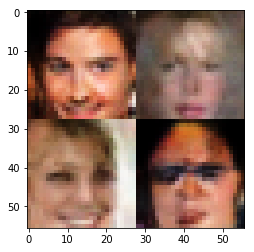

Epoch 6/10... Discriminator Loss: 0.4071... Generator Loss: 1.5048
Epoch 6/10... Discriminator Loss: 0.4137... Generator Loss: 1.9113
Epoch 6/10... Discriminator Loss: 0.7667... Generator Loss: 1.8903
Epoch 6/10... Discriminator Loss: 0.9106... Generator Loss: 0.9260


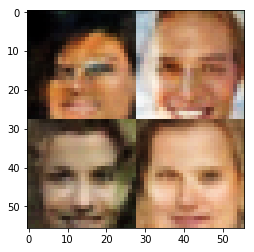

Epoch 6/10... Discriminator Loss: 1.5896... Generator Loss: 0.3148
Epoch 6/10... Discriminator Loss: 0.6039... Generator Loss: 2.5177
Epoch 6/10... Discriminator Loss: 0.4842... Generator Loss: 1.3080
Epoch 6/10... Discriminator Loss: 0.8035... Generator Loss: 2.5253


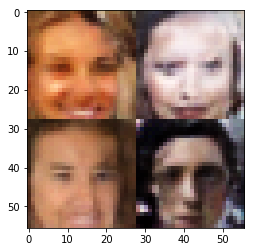

Epoch 6/10... Discriminator Loss: 0.7262... Generator Loss: 1.8811
Epoch 6/10... Discriminator Loss: 0.3404... Generator Loss: 2.6660
Epoch 6/10... Discriminator Loss: 0.4074... Generator Loss: 3.1967
Epoch 6/10... Discriminator Loss: 0.2991... Generator Loss: 2.0290


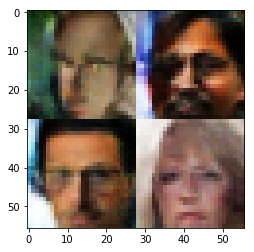

Epoch 6/10... Discriminator Loss: 0.5052... Generator Loss: 1.6322
Epoch 6/10... Discriminator Loss: 0.7540... Generator Loss: 1.0815
Epoch 6/10... Discriminator Loss: 0.6144... Generator Loss: 1.1476
Epoch 6/10... Discriminator Loss: 0.7462... Generator Loss: 2.8744


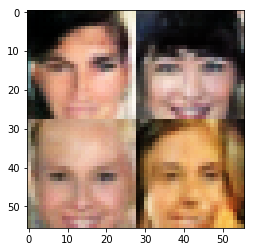

Epoch 6/10... Discriminator Loss: 0.5959... Generator Loss: 1.2830
Epoch 6/10... Discriminator Loss: 0.7629... Generator Loss: 1.8128
Epoch 6/10... Discriminator Loss: 1.8604... Generator Loss: 0.2499
Epoch 6/10... Discriminator Loss: 0.5554... Generator Loss: 1.2520


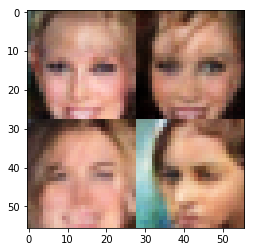

Epoch 6/10... Discriminator Loss: 1.6472... Generator Loss: 0.3062
Epoch 6/10... Discriminator Loss: 0.9423... Generator Loss: 2.2445
Epoch 6/10... Discriminator Loss: 0.5468... Generator Loss: 1.8785
Epoch 7/10... Discriminator Loss: 0.6048... Generator Loss: 1.4726


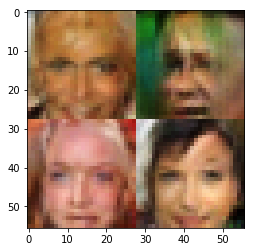

Epoch 7/10... Discriminator Loss: 1.2811... Generator Loss: 0.4618
Epoch 7/10... Discriminator Loss: 0.7657... Generator Loss: 1.9537
Epoch 7/10... Discriminator Loss: 0.6934... Generator Loss: 1.6596
Epoch 7/10... Discriminator Loss: 0.7246... Generator Loss: 1.1107


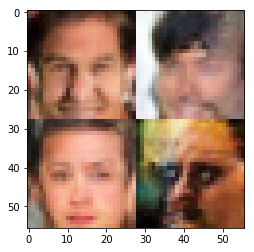

Epoch 7/10... Discriminator Loss: 0.6285... Generator Loss: 1.0901
Epoch 7/10... Discriminator Loss: 0.8290... Generator Loss: 0.8674
Epoch 7/10... Discriminator Loss: 0.9289... Generator Loss: 0.7455
Epoch 7/10... Discriminator Loss: 0.5127... Generator Loss: 1.4286


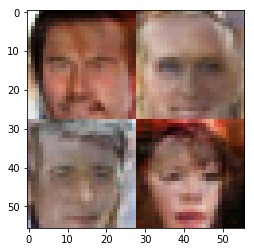

Epoch 7/10... Discriminator Loss: 1.0129... Generator Loss: 0.7688
Epoch 7/10... Discriminator Loss: 0.6326... Generator Loss: 1.9813
Epoch 7/10... Discriminator Loss: 0.3675... Generator Loss: 1.8631
Epoch 7/10... Discriminator Loss: 1.2029... Generator Loss: 0.4885


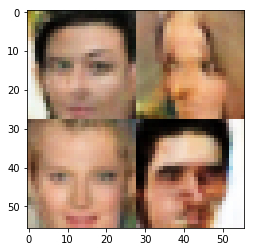

Epoch 7/10... Discriminator Loss: 0.7315... Generator Loss: 0.9291
Epoch 7/10... Discriminator Loss: 0.6192... Generator Loss: 2.3156
Epoch 7/10... Discriminator Loss: 0.5814... Generator Loss: 2.3756
Epoch 7/10... Discriminator Loss: 0.5496... Generator Loss: 1.2358


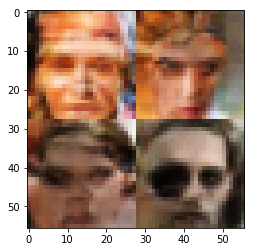

Epoch 7/10... Discriminator Loss: 0.8723... Generator Loss: 0.7880
Epoch 7/10... Discriminator Loss: 0.4065... Generator Loss: 2.0887
Epoch 7/10... Discriminator Loss: 0.7374... Generator Loss: 0.8980
Epoch 7/10... Discriminator Loss: 0.6442... Generator Loss: 1.1312


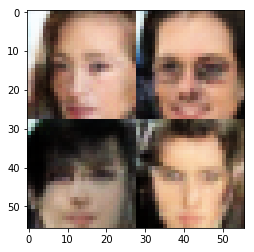

Epoch 7/10... Discriminator Loss: 0.3506... Generator Loss: 1.8749
Epoch 7/10... Discriminator Loss: 0.3795... Generator Loss: 1.6804
Epoch 7/10... Discriminator Loss: 0.4093... Generator Loss: 2.1180
Epoch 7/10... Discriminator Loss: 0.8331... Generator Loss: 3.0889


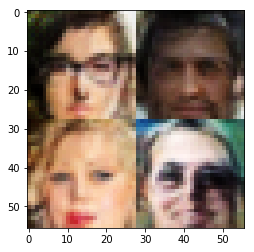

Epoch 7/10... Discriminator Loss: 0.6004... Generator Loss: 1.7519
Epoch 7/10... Discriminator Loss: 0.7796... Generator Loss: 1.0067
Epoch 7/10... Discriminator Loss: 0.7785... Generator Loss: 0.9318
Epoch 7/10... Discriminator Loss: 0.6592... Generator Loss: 1.1493


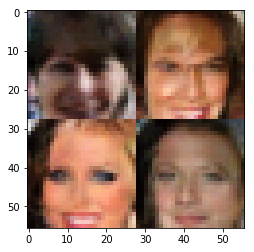

Epoch 7/10... Discriminator Loss: 0.9126... Generator Loss: 0.7138
Epoch 7/10... Discriminator Loss: 1.0888... Generator Loss: 0.6156
Epoch 7/10... Discriminator Loss: 0.6167... Generator Loss: 1.0971
Epoch 7/10... Discriminator Loss: 0.6319... Generator Loss: 2.4888


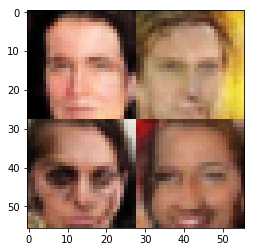

Epoch 7/10... Discriminator Loss: 0.9430... Generator Loss: 1.0020
Epoch 7/10... Discriminator Loss: 0.9971... Generator Loss: 0.8110
Epoch 7/10... Discriminator Loss: 0.3679... Generator Loss: 2.8662
Epoch 7/10... Discriminator Loss: 0.5140... Generator Loss: 2.0524


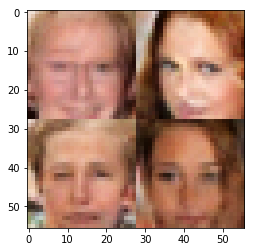

Epoch 7/10... Discriminator Loss: 0.5701... Generator Loss: 2.3046
Epoch 7/10... Discriminator Loss: 0.5288... Generator Loss: 2.3803
Epoch 7/10... Discriminator Loss: 1.3737... Generator Loss: 0.4554
Epoch 7/10... Discriminator Loss: 1.7680... Generator Loss: 0.2815


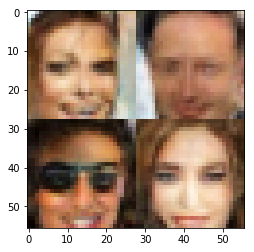

Epoch 7/10... Discriminator Loss: 0.9285... Generator Loss: 0.7308
Epoch 7/10... Discriminator Loss: 1.0848... Generator Loss: 0.6208
Epoch 7/10... Discriminator Loss: 1.2810... Generator Loss: 0.4787
Epoch 7/10... Discriminator Loss: 0.7577... Generator Loss: 1.0168


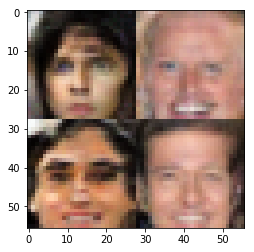

Epoch 7/10... Discriminator Loss: 0.6933... Generator Loss: 1.2849
Epoch 7/10... Discriminator Loss: 0.7139... Generator Loss: 1.0337
Epoch 7/10... Discriminator Loss: 0.9899... Generator Loss: 1.6578
Epoch 7/10... Discriminator Loss: 1.1672... Generator Loss: 0.5154


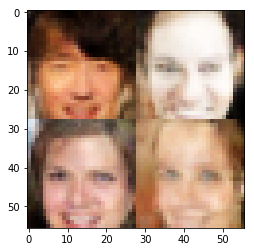

Epoch 7/10... Discriminator Loss: 0.6085... Generator Loss: 1.3427
Epoch 7/10... Discriminator Loss: 0.5654... Generator Loss: 1.4212
Epoch 7/10... Discriminator Loss: 0.9483... Generator Loss: 2.1106
Epoch 7/10... Discriminator Loss: 0.5039... Generator Loss: 1.9821


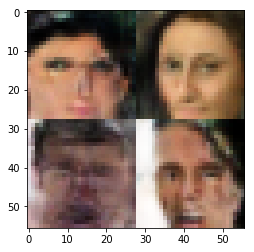

Epoch 7/10... Discriminator Loss: 0.5523... Generator Loss: 1.9878
Epoch 7/10... Discriminator Loss: 0.6639... Generator Loss: 1.6556
Epoch 7/10... Discriminator Loss: 0.5277... Generator Loss: 1.6881
Epoch 7/10... Discriminator Loss: 1.2158... Generator Loss: 0.5030


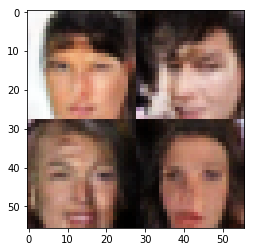

Epoch 7/10... Discriminator Loss: 0.8053... Generator Loss: 0.9293
Epoch 7/10... Discriminator Loss: 0.8681... Generator Loss: 0.9541
Epoch 7/10... Discriminator Loss: 0.5597... Generator Loss: 1.4150
Epoch 7/10... Discriminator Loss: 0.5388... Generator Loss: 3.5343


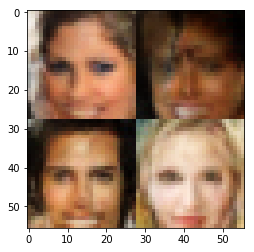

Epoch 7/10... Discriminator Loss: 1.1847... Generator Loss: 0.5161
Epoch 7/10... Discriminator Loss: 0.7975... Generator Loss: 0.9373
Epoch 8/10... Discriminator Loss: 0.9120... Generator Loss: 0.8215
Epoch 8/10... Discriminator Loss: 0.9966... Generator Loss: 0.6874


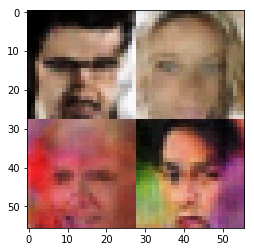

Epoch 8/10... Discriminator Loss: 0.5381... Generator Loss: 1.3485
Epoch 8/10... Discriminator Loss: 1.2837... Generator Loss: 0.4615
Epoch 8/10... Discriminator Loss: 0.8331... Generator Loss: 0.8366
Epoch 8/10... Discriminator Loss: 1.1338... Generator Loss: 0.5898


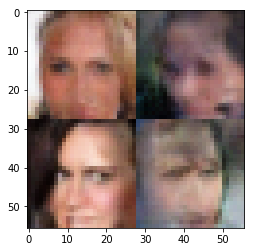

Epoch 8/10... Discriminator Loss: 0.7006... Generator Loss: 1.8171
Epoch 8/10... Discriminator Loss: 1.0910... Generator Loss: 0.5974
Epoch 8/10... Discriminator Loss: 0.7922... Generator Loss: 0.8877
Epoch 8/10... Discriminator Loss: 0.5962... Generator Loss: 1.2339


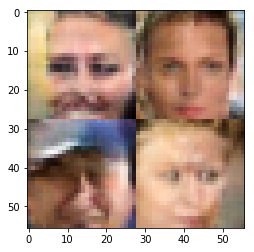

Epoch 8/10... Discriminator Loss: 1.0050... Generator Loss: 0.6735
Epoch 8/10... Discriminator Loss: 0.6851... Generator Loss: 1.1657
Epoch 8/10... Discriminator Loss: 0.5609... Generator Loss: 1.1462
Epoch 8/10... Discriminator Loss: 1.1009... Generator Loss: 0.5442


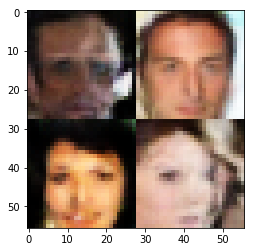

Epoch 8/10... Discriminator Loss: 1.5468... Generator Loss: 0.3409
Epoch 8/10... Discriminator Loss: 1.4219... Generator Loss: 0.3854
Epoch 8/10... Discriminator Loss: 0.8104... Generator Loss: 0.8375
Epoch 8/10... Discriminator Loss: 0.5087... Generator Loss: 1.4627


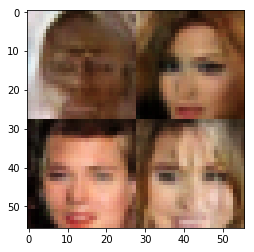

Epoch 8/10... Discriminator Loss: 0.9014... Generator Loss: 0.7096
Epoch 8/10... Discriminator Loss: 0.3298... Generator Loss: 1.8709
Epoch 8/10... Discriminator Loss: 0.8223... Generator Loss: 1.8902
Epoch 8/10... Discriminator Loss: 0.7874... Generator Loss: 1.1736


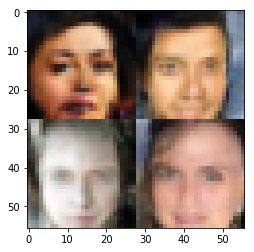

Epoch 8/10... Discriminator Loss: 0.7936... Generator Loss: 0.9698
Epoch 8/10... Discriminator Loss: 1.2972... Generator Loss: 0.4731
Epoch 8/10... Discriminator Loss: 0.7505... Generator Loss: 1.0416
Epoch 8/10... Discriminator Loss: 1.3978... Generator Loss: 0.4462


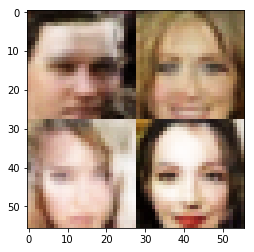

Epoch 8/10... Discriminator Loss: 0.2859... Generator Loss: 2.2187
Epoch 8/10... Discriminator Loss: 0.8316... Generator Loss: 1.5223
Epoch 8/10... Discriminator Loss: 0.7516... Generator Loss: 2.1039
Epoch 8/10... Discriminator Loss: 0.9910... Generator Loss: 0.7141


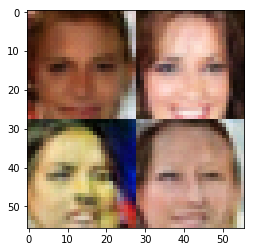

Epoch 8/10... Discriminator Loss: 0.8878... Generator Loss: 0.7187
Epoch 8/10... Discriminator Loss: 0.7034... Generator Loss: 2.8639
Epoch 8/10... Discriminator Loss: 0.8292... Generator Loss: 0.8583
Epoch 8/10... Discriminator Loss: 2.3133... Generator Loss: 3.5459


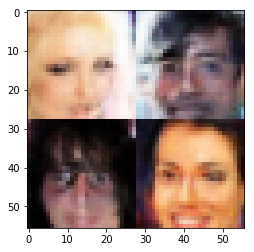

Epoch 8/10... Discriminator Loss: 0.7669... Generator Loss: 1.6345
Epoch 8/10... Discriminator Loss: 1.3098... Generator Loss: 0.4939
Epoch 8/10... Discriminator Loss: 1.5070... Generator Loss: 0.3611
Epoch 8/10... Discriminator Loss: 0.7144... Generator Loss: 0.9613


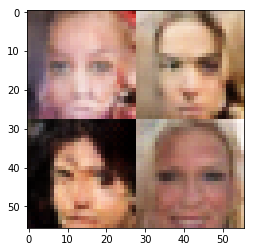

Epoch 8/10... Discriminator Loss: 0.6704... Generator Loss: 0.9710
Epoch 8/10... Discriminator Loss: 0.9372... Generator Loss: 2.6232
Epoch 8/10... Discriminator Loss: 0.5719... Generator Loss: 1.2168
Epoch 8/10... Discriminator Loss: 1.2239... Generator Loss: 0.4863


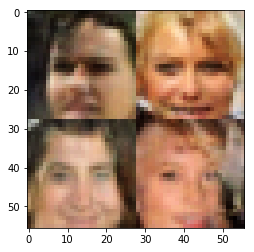

Epoch 8/10... Discriminator Loss: 0.4440... Generator Loss: 1.8811
Epoch 8/10... Discriminator Loss: 1.4713... Generator Loss: 0.3690
Epoch 8/10... Discriminator Loss: 1.0186... Generator Loss: 0.6741
Epoch 8/10... Discriminator Loss: 0.6889... Generator Loss: 1.0521


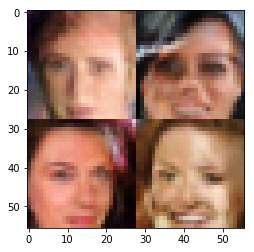

Epoch 8/10... Discriminator Loss: 0.9572... Generator Loss: 0.7373
Epoch 8/10... Discriminator Loss: 1.1785... Generator Loss: 0.5326
Epoch 8/10... Discriminator Loss: 0.5539... Generator Loss: 1.3856
Epoch 8/10... Discriminator Loss: 0.7053... Generator Loss: 1.0606


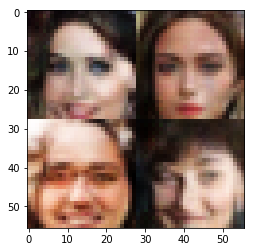

Epoch 8/10... Discriminator Loss: 0.4517... Generator Loss: 1.6053
Epoch 8/10... Discriminator Loss: 0.4147... Generator Loss: 2.0624
Epoch 8/10... Discriminator Loss: 0.6898... Generator Loss: 1.0569
Epoch 8/10... Discriminator Loss: 0.7958... Generator Loss: 1.0985


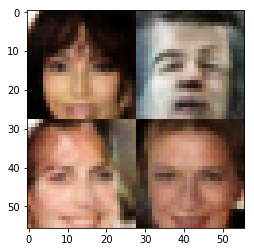

Epoch 8/10... Discriminator Loss: 0.4981... Generator Loss: 1.3693
Epoch 8/10... Discriminator Loss: 0.8955... Generator Loss: 1.0915
Epoch 8/10... Discriminator Loss: 0.7317... Generator Loss: 1.0043
Epoch 8/10... Discriminator Loss: 0.6985... Generator Loss: 1.2431


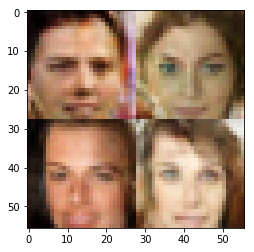

Epoch 8/10... Discriminator Loss: 0.5566... Generator Loss: 1.2225
Epoch 8/10... Discriminator Loss: 0.5425... Generator Loss: 1.4844
Epoch 8/10... Discriminator Loss: 0.9727... Generator Loss: 0.6422
Epoch 8/10... Discriminator Loss: 0.5425... Generator Loss: 1.5300


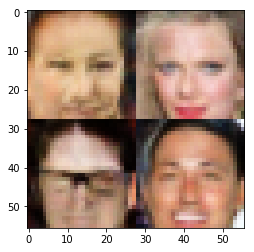

Epoch 8/10... Discriminator Loss: 1.4368... Generator Loss: 0.3877
Epoch 8/10... Discriminator Loss: 0.9387... Generator Loss: 0.9251
Epoch 9/10... Discriminator Loss: 0.4102... Generator Loss: 2.2602
Epoch 9/10... Discriminator Loss: 0.8347... Generator Loss: 1.3482


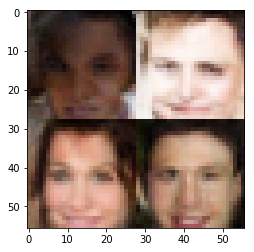

Epoch 9/10... Discriminator Loss: 0.6597... Generator Loss: 1.5029
Epoch 9/10... Discriminator Loss: 1.1003... Generator Loss: 0.5787
Epoch 9/10... Discriminator Loss: 0.4798... Generator Loss: 2.7447
Epoch 9/10... Discriminator Loss: 0.6391... Generator Loss: 1.4237


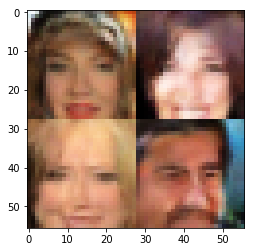

Epoch 9/10... Discriminator Loss: 0.7096... Generator Loss: 2.7190
Epoch 9/10... Discriminator Loss: 1.1285... Generator Loss: 0.6485
Epoch 9/10... Discriminator Loss: 0.8314... Generator Loss: 1.3693
Epoch 9/10... Discriminator Loss: 0.4760... Generator Loss: 1.6846


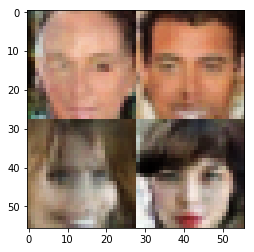

Epoch 9/10... Discriminator Loss: 0.6425... Generator Loss: 1.1832
Epoch 9/10... Discriminator Loss: 0.5925... Generator Loss: 1.5018
Epoch 9/10... Discriminator Loss: 1.5201... Generator Loss: 0.3510
Epoch 9/10... Discriminator Loss: 0.8942... Generator Loss: 0.9333


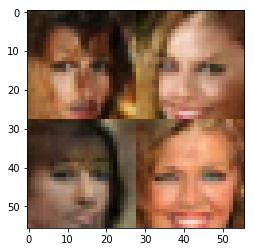

Epoch 9/10... Discriminator Loss: 0.7302... Generator Loss: 1.6639
Epoch 9/10... Discriminator Loss: 1.0502... Generator Loss: 0.6694
Epoch 9/10... Discriminator Loss: 1.1363... Generator Loss: 0.5474
Epoch 9/10... Discriminator Loss: 0.5551... Generator Loss: 1.9009


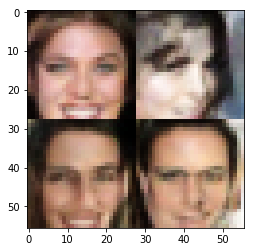

Epoch 9/10... Discriminator Loss: 0.8561... Generator Loss: 1.2814
Epoch 9/10... Discriminator Loss: 0.6518... Generator Loss: 1.2885
Epoch 9/10... Discriminator Loss: 1.5484... Generator Loss: 0.4146
Epoch 9/10... Discriminator Loss: 1.0536... Generator Loss: 0.6433


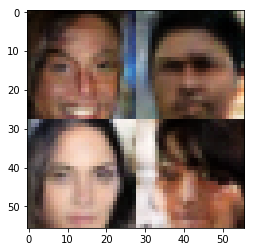

Epoch 9/10... Discriminator Loss: 1.2600... Generator Loss: 0.5209
Epoch 9/10... Discriminator Loss: 0.6693... Generator Loss: 1.3975
Epoch 9/10... Discriminator Loss: 0.7197... Generator Loss: 1.4697
Epoch 9/10... Discriminator Loss: 0.7128... Generator Loss: 1.0896


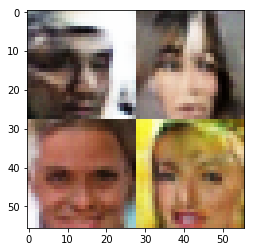

Epoch 9/10... Discriminator Loss: 0.3367... Generator Loss: 2.0423
Epoch 9/10... Discriminator Loss: 0.6379... Generator Loss: 1.3853
Epoch 9/10... Discriminator Loss: 1.1590... Generator Loss: 0.6014
Epoch 9/10... Discriminator Loss: 1.2245... Generator Loss: 0.5767


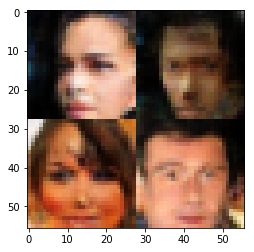

Epoch 9/10... Discriminator Loss: 0.8436... Generator Loss: 0.8636
Epoch 9/10... Discriminator Loss: 1.0289... Generator Loss: 0.6387
Epoch 9/10... Discriminator Loss: 1.1256... Generator Loss: 0.5584
Epoch 9/10... Discriminator Loss: 1.5967... Generator Loss: 0.3585


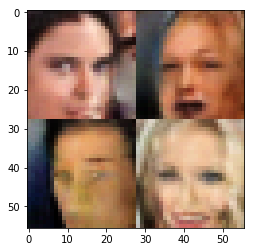

Epoch 9/10... Discriminator Loss: 0.5076... Generator Loss: 1.4384
Epoch 9/10... Discriminator Loss: 0.2614... Generator Loss: 2.1081
Epoch 9/10... Discriminator Loss: 1.4392... Generator Loss: 3.6135
Epoch 9/10... Discriminator Loss: 1.2683... Generator Loss: 0.5068


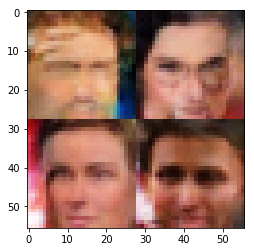

Epoch 9/10... Discriminator Loss: 1.3049... Generator Loss: 1.9905
Epoch 9/10... Discriminator Loss: 0.9453... Generator Loss: 0.6894
Epoch 9/10... Discriminator Loss: 0.8654... Generator Loss: 0.9374
Epoch 9/10... Discriminator Loss: 0.7046... Generator Loss: 1.1219


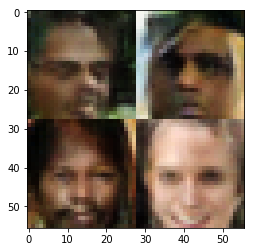

Epoch 9/10... Discriminator Loss: 0.3990... Generator Loss: 1.7251
Epoch 9/10... Discriminator Loss: 0.6012... Generator Loss: 1.3753
Epoch 9/10... Discriminator Loss: 1.3516... Generator Loss: 0.4468
Epoch 9/10... Discriminator Loss: 0.8352... Generator Loss: 0.8295


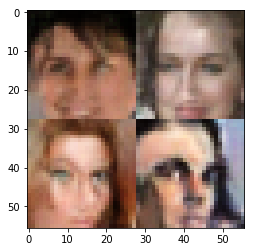

Epoch 9/10... Discriminator Loss: 0.9707... Generator Loss: 0.8300
Epoch 9/10... Discriminator Loss: 0.3430... Generator Loss: 2.2475
Epoch 9/10... Discriminator Loss: 0.4785... Generator Loss: 1.3750
Epoch 9/10... Discriminator Loss: 0.4185... Generator Loss: 2.0941


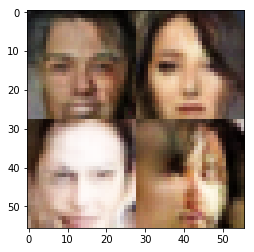

Epoch 9/10... Discriminator Loss: 0.5075... Generator Loss: 2.3516
Epoch 9/10... Discriminator Loss: 0.2653... Generator Loss: 2.7955
Epoch 9/10... Discriminator Loss: 0.7330... Generator Loss: 1.1193
Epoch 9/10... Discriminator Loss: 1.4222... Generator Loss: 0.4547


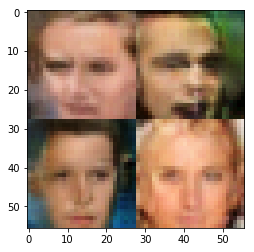

Epoch 9/10... Discriminator Loss: 1.3901... Generator Loss: 0.4368
Epoch 9/10... Discriminator Loss: 1.5585... Generator Loss: 0.3256
Epoch 9/10... Discriminator Loss: 0.4997... Generator Loss: 1.6960
Epoch 9/10... Discriminator Loss: 0.6336... Generator Loss: 1.1682


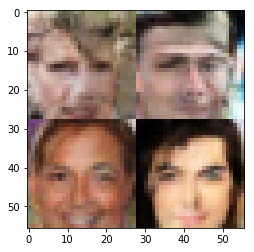

Epoch 9/10... Discriminator Loss: 0.8716... Generator Loss: 0.8874
Epoch 9/10... Discriminator Loss: 0.9495... Generator Loss: 0.8195
Epoch 9/10... Discriminator Loss: 0.5633... Generator Loss: 1.4280
Epoch 9/10... Discriminator Loss: 1.0125... Generator Loss: 1.1671


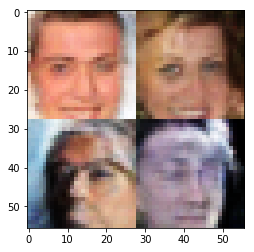

Epoch 9/10... Discriminator Loss: 0.6810... Generator Loss: 1.0663
Epoch 10/10... Discriminator Loss: 0.9191... Generator Loss: 0.7467
Epoch 10/10... Discriminator Loss: 0.5201... Generator Loss: 1.6694
Epoch 10/10... Discriminator Loss: 0.6348... Generator Loss: 1.7607


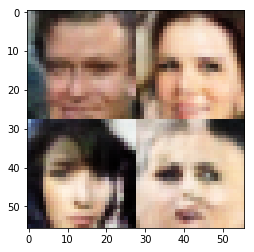

Epoch 10/10... Discriminator Loss: 0.8060... Generator Loss: 0.9121
Epoch 10/10... Discriminator Loss: 1.7137... Generator Loss: 0.2752
Epoch 10/10... Discriminator Loss: 1.2090... Generator Loss: 0.5289
Epoch 10/10... Discriminator Loss: 1.6818... Generator Loss: 0.2802


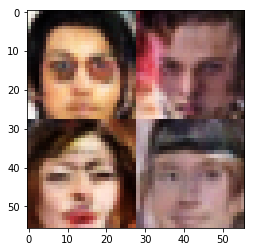

Epoch 10/10... Discriminator Loss: 0.7773... Generator Loss: 0.8932
Epoch 10/10... Discriminator Loss: 0.9613... Generator Loss: 0.6494
Epoch 10/10... Discriminator Loss: 0.9744... Generator Loss: 0.6853
Epoch 10/10... Discriminator Loss: 0.6930... Generator Loss: 1.3141


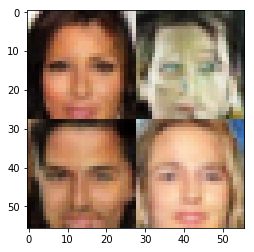

Epoch 10/10... Discriminator Loss: 0.8292... Generator Loss: 1.0945
Epoch 10/10... Discriminator Loss: 0.5955... Generator Loss: 1.2676
Epoch 10/10... Discriminator Loss: 1.2540... Generator Loss: 0.5179
Epoch 10/10... Discriminator Loss: 1.4118... Generator Loss: 0.3946


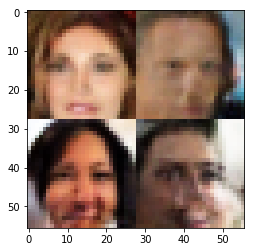

Epoch 10/10... Discriminator Loss: 1.0263... Generator Loss: 0.6479
Epoch 10/10... Discriminator Loss: 1.5892... Generator Loss: 0.3477
Epoch 10/10... Discriminator Loss: 0.7601... Generator Loss: 0.9381
Epoch 10/10... Discriminator Loss: 1.3000... Generator Loss: 2.4931


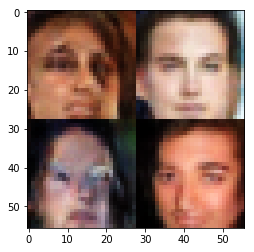

Epoch 10/10... Discriminator Loss: 0.2938... Generator Loss: 2.1198
Epoch 10/10... Discriminator Loss: 0.8949... Generator Loss: 0.7530
Epoch 10/10... Discriminator Loss: 0.2669... Generator Loss: 2.6448
Epoch 10/10... Discriminator Loss: 0.5843... Generator Loss: 1.1905


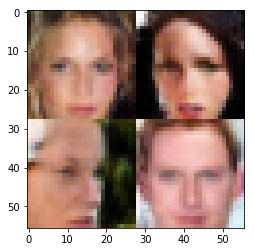

Epoch 10/10... Discriminator Loss: 0.7404... Generator Loss: 0.9659
Epoch 10/10... Discriminator Loss: 0.8365... Generator Loss: 2.6852
Epoch 10/10... Discriminator Loss: 1.6167... Generator Loss: 0.3229
Epoch 10/10... Discriminator Loss: 0.5925... Generator Loss: 1.3451


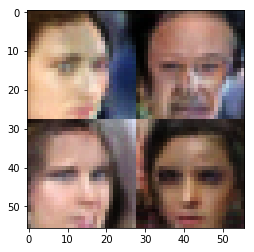

Epoch 10/10... Discriminator Loss: 1.7435... Generator Loss: 0.2959
Epoch 10/10... Discriminator Loss: 0.3667... Generator Loss: 1.9583
Epoch 10/10... Discriminator Loss: 0.8892... Generator Loss: 0.7945
Epoch 10/10... Discriminator Loss: 1.3141... Generator Loss: 0.4397


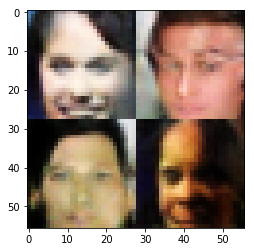

Epoch 10/10... Discriminator Loss: 0.4963... Generator Loss: 1.5052
Epoch 10/10... Discriminator Loss: 1.0736... Generator Loss: 0.5829
Epoch 10/10... Discriminator Loss: 1.0631... Generator Loss: 0.8708
Epoch 10/10... Discriminator Loss: 0.7492... Generator Loss: 1.1069


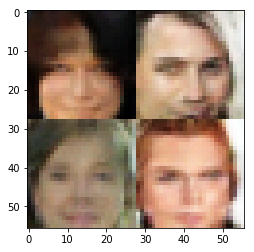

Epoch 10/10... Discriminator Loss: 0.6799... Generator Loss: 1.0228
Epoch 10/10... Discriminator Loss: 0.7018... Generator Loss: 1.0288
Epoch 10/10... Discriminator Loss: 0.4971... Generator Loss: 1.5125
Epoch 10/10... Discriminator Loss: 0.8842... Generator Loss: 0.8747


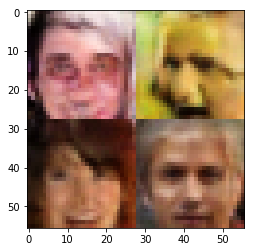

Epoch 10/10... Discriminator Loss: 0.6215... Generator Loss: 2.5345
Epoch 10/10... Discriminator Loss: 0.6247... Generator Loss: 1.8963
Epoch 10/10... Discriminator Loss: 0.6213... Generator Loss: 1.2586
Epoch 10/10... Discriminator Loss: 0.8930... Generator Loss: 0.8100


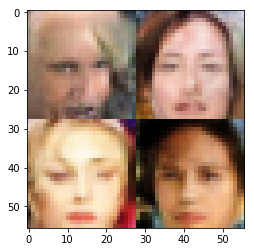

Epoch 10/10... Discriminator Loss: 0.6251... Generator Loss: 1.3616
Epoch 10/10... Discriminator Loss: 0.7660... Generator Loss: 1.3117
Epoch 10/10... Discriminator Loss: 0.9905... Generator Loss: 0.8064
Epoch 10/10... Discriminator Loss: 1.1600... Generator Loss: 1.8438


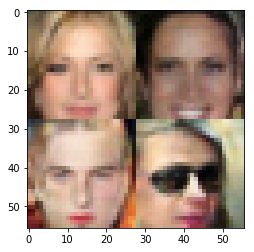

Epoch 10/10... Discriminator Loss: 1.0306... Generator Loss: 0.7269
Epoch 10/10... Discriminator Loss: 0.4211... Generator Loss: 1.7817
Epoch 10/10... Discriminator Loss: 0.7664... Generator Loss: 0.9312
Epoch 10/10... Discriminator Loss: 1.0268... Generator Loss: 0.6270


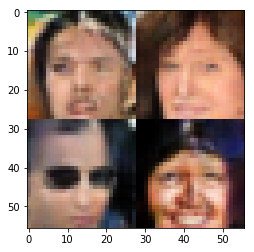

Epoch 10/10... Discriminator Loss: 0.8357... Generator Loss: 0.8785
Epoch 10/10... Discriminator Loss: 0.8969... Generator Loss: 0.7081
Epoch 10/10... Discriminator Loss: 0.6530... Generator Loss: 1.4323
Epoch 10/10... Discriminator Loss: 1.0093... Generator Loss: 0.6321


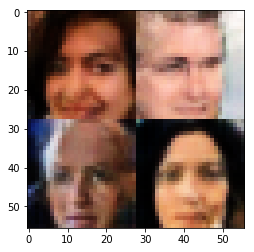

Epoch 10/10... Discriminator Loss: 0.7216... Generator Loss: 1.2239
Epoch 10/10... Discriminator Loss: 0.7907... Generator Loss: 1.3076
Epoch 10/10... Discriminator Loss: 1.1046... Generator Loss: 0.6583
Epoch 10/10... Discriminator Loss: 0.4525... Generator Loss: 1.9072


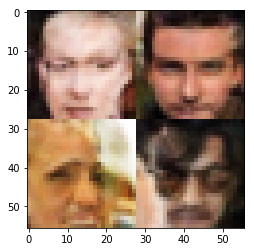

Epoch 10/10... Discriminator Loss: 0.3508... Generator Loss: 1.9830
Epoch 10/10... Discriminator Loss: 0.8181... Generator Loss: 0.8458
Epoch 10/10... Discriminator Loss: 0.8200... Generator Loss: 1.7297
Epoch 10/10... Discriminator Loss: 0.7016... Generator Loss: 1.1534


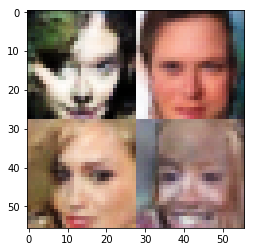

In [171]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.